In [35]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4
import matplotlib.image as imag
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA,IncrementalPCA
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from statistics import mode
from scipy.ndimage.filters import uniform_filter1d
from sklearn.utils import shuffle
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [36]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [37]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [38]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [39]:
Diurnal_Amazon_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Single_Day_2D_PCA_Latent_Space__31.npy")
Diurnal_Amazon_W_Test_3D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/3D_Day_2D_PCA_Latent_Space__31.npy")

z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/2D_PCA_Latent_Space__31.npy")


Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/test_day.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

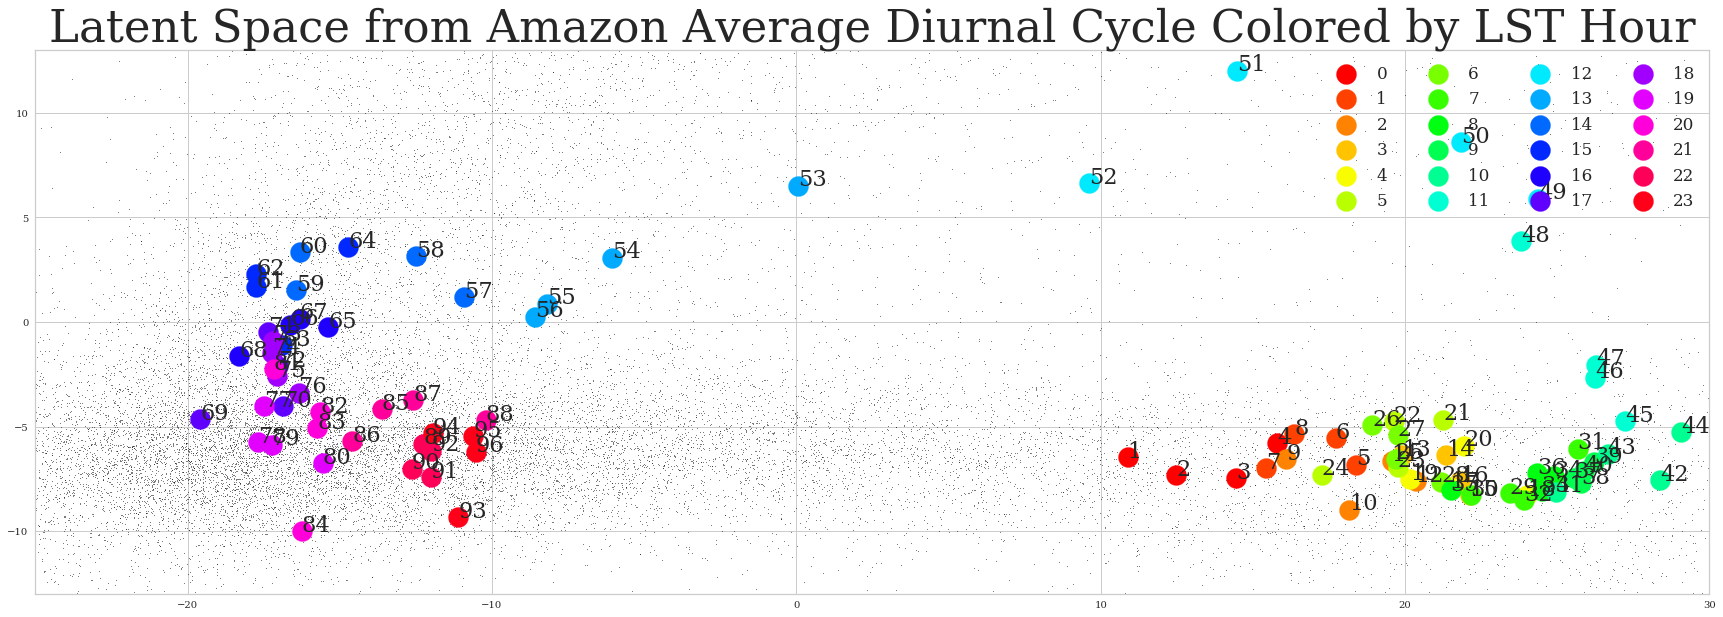

In [40]:
colors = cm.hsv(np.linspace(0, 1, int(len(Diurnal_Amazon_W_Test_2D)/4)))
bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c="black", s=0.2)
count = -1
for i in range(len(Diurnal_Amazon_W_Test_2D)):
    if i%4 == 0:
        count = count+1
        cb = ax.scatter(x=Diurnal_Amazon_W_Test_2D[i, 0], y=Diurnal_Amazon_W_Test_2D[i, 1], c=colors[count], s=400, label=str(int(i/4)))
    else:
        cb = ax.scatter(x=Diurnal_Amazon_W_Test_2D[i, 0], y=Diurnal_Amazon_W_Test_2D[i, 1], c=colors[count], s=400)
        
#ax.legend(bbox_to_anchor=(0.999, 1.00))
ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
#ax.legend(loc="lower left", mode = "expand", ncol=24, fontsize=fz/2)
ax.set_title("Latent Space from Amazon Average Diurnal Cycle Colored by LST Hour", fontsize=fz*2)
ax.set_ylim(-13, 13)
ax.set_xlim(-25, 30)
for i in range(len(Diurnal_Amazon_W_Test_2D)):
    ax.annotate(str(i+1), (Diurnal_Amazon_W_Test_2D[i, 0], Diurnal_Amazon_W_Test_2D[i, 1]))

1


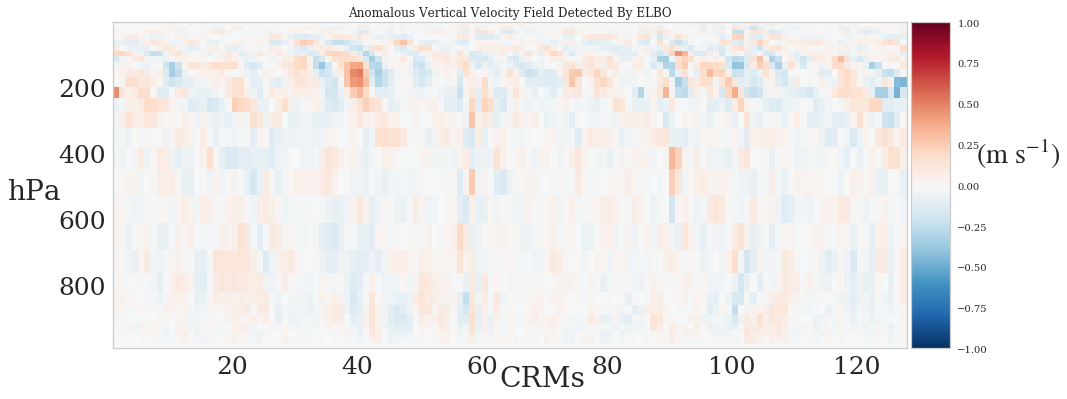

2


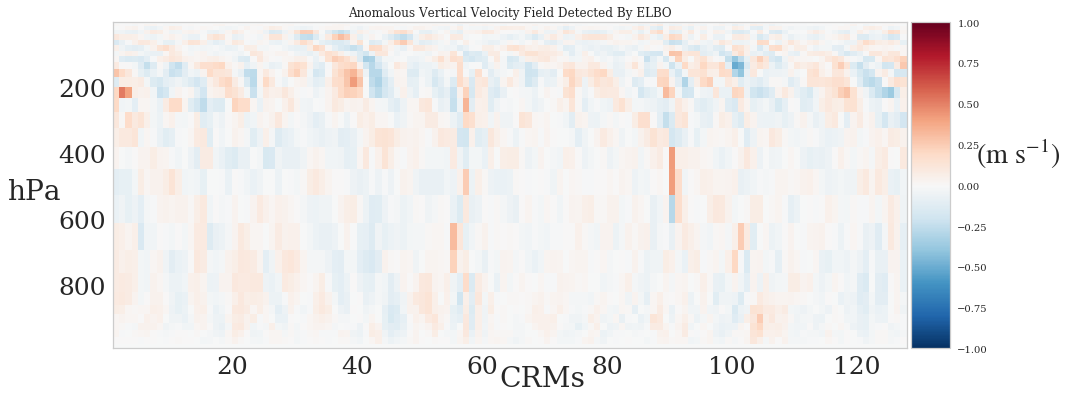

3


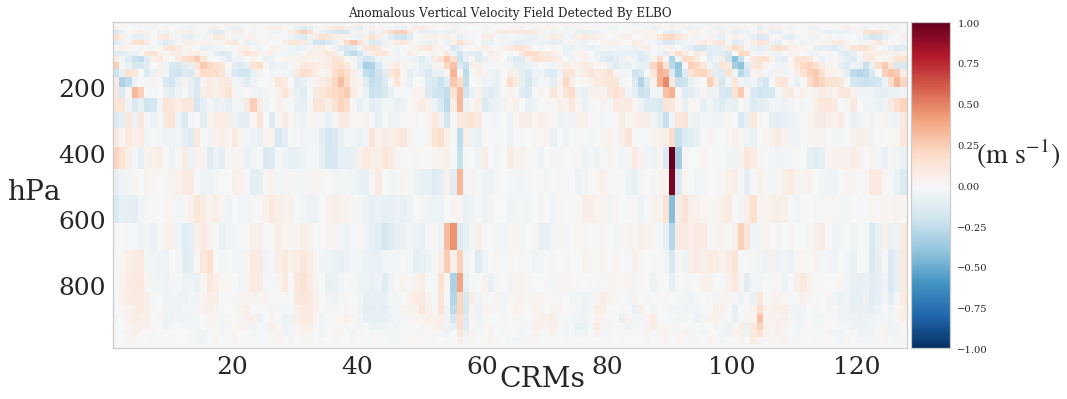

4


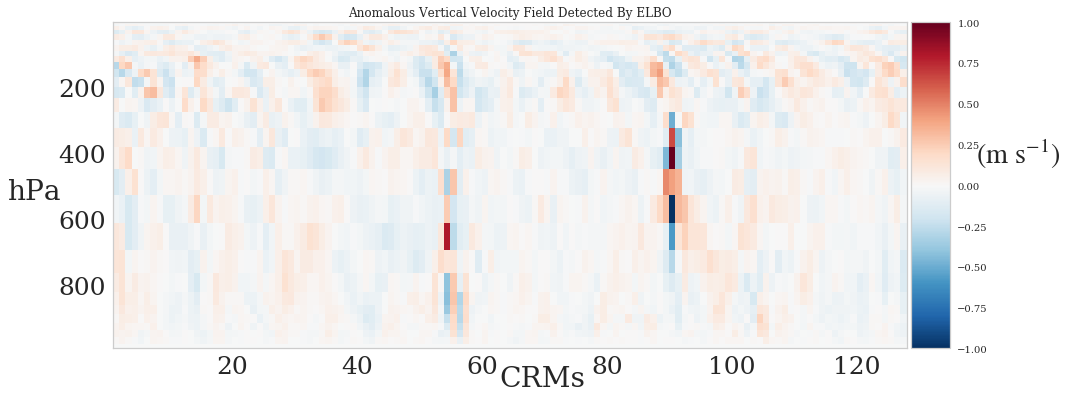

5


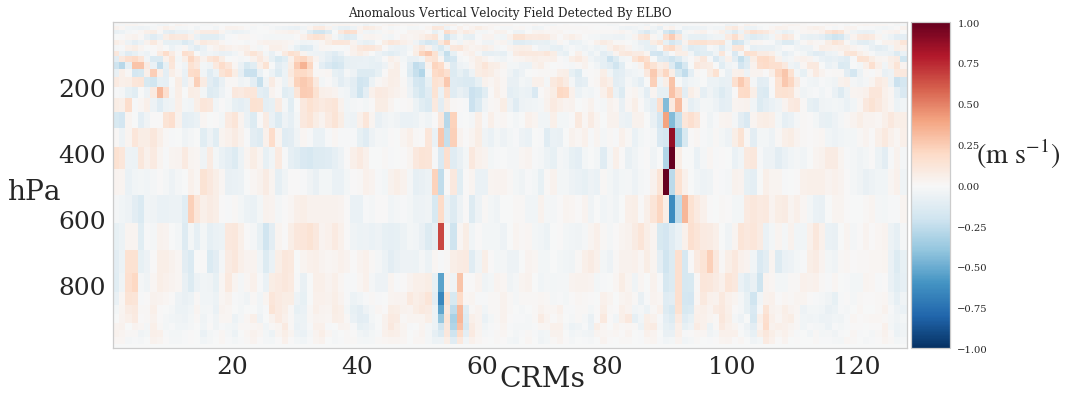

6


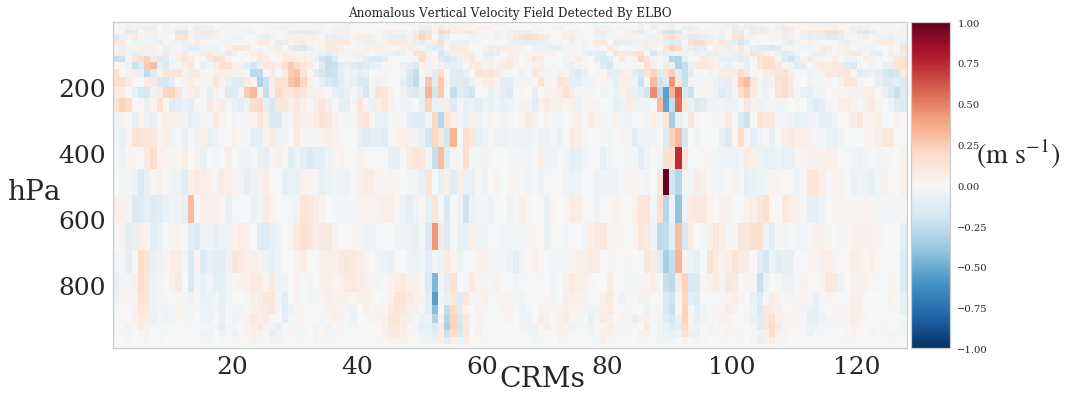

7


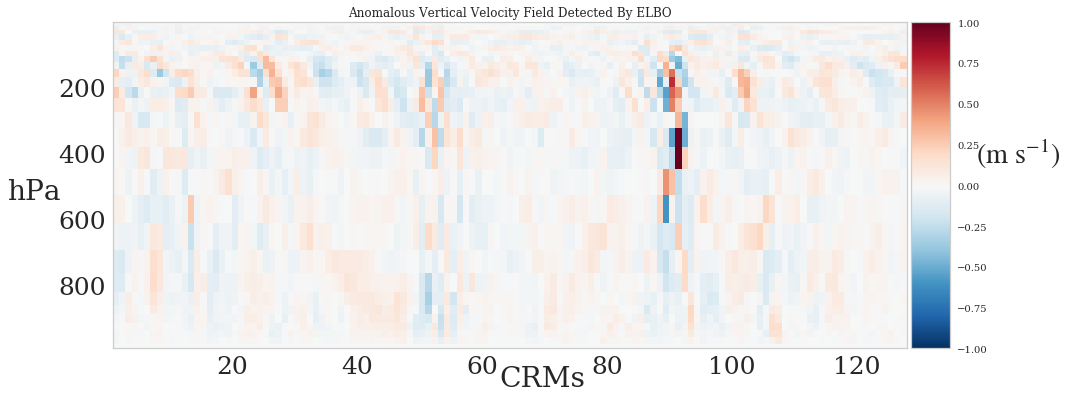

8


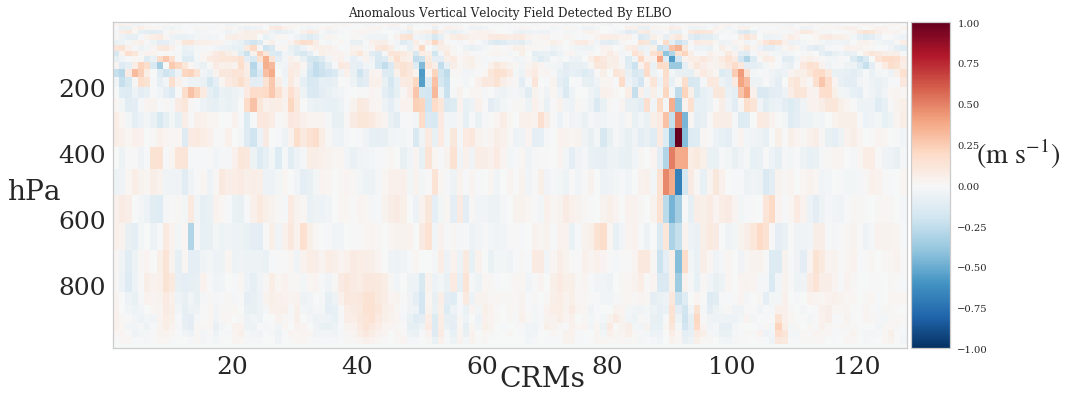

9


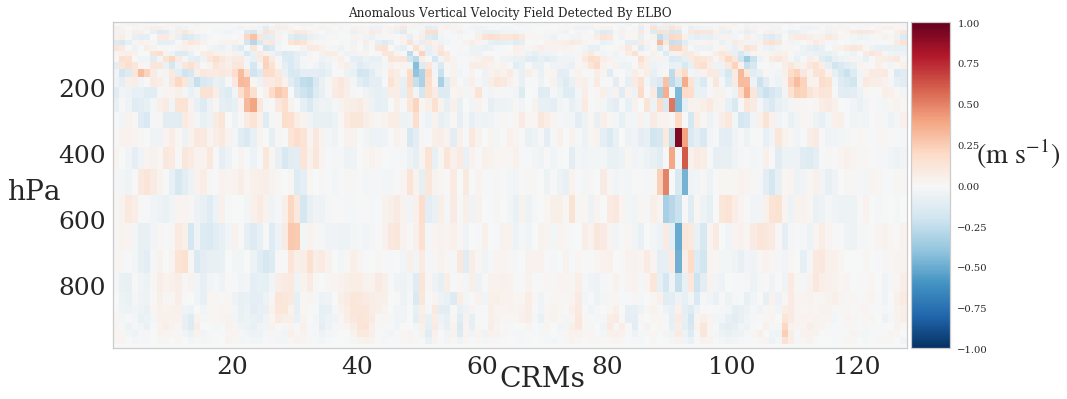

10


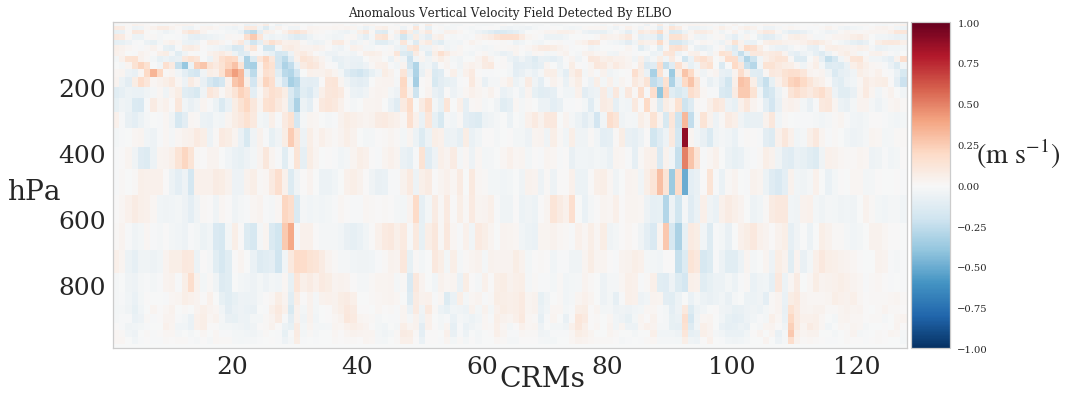

11


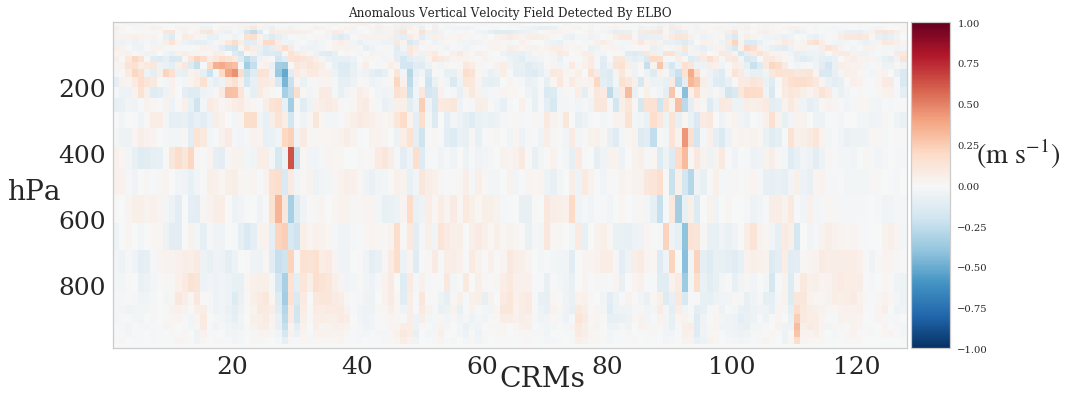

12


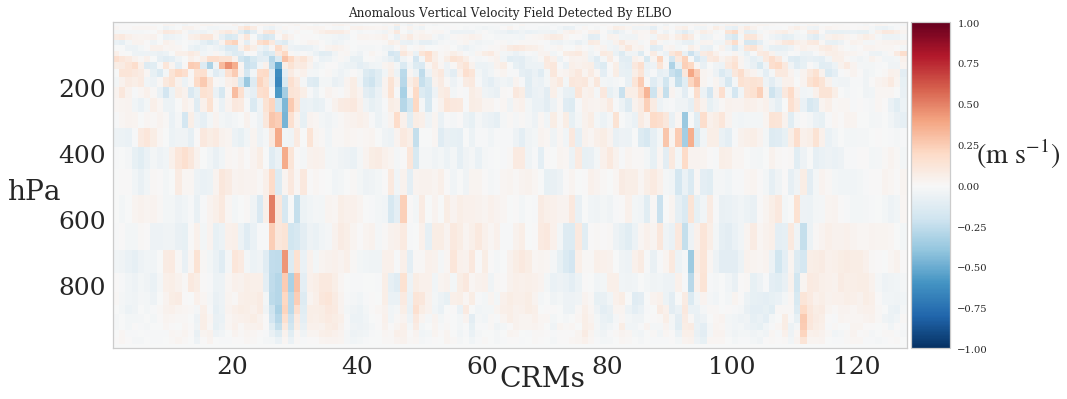

13


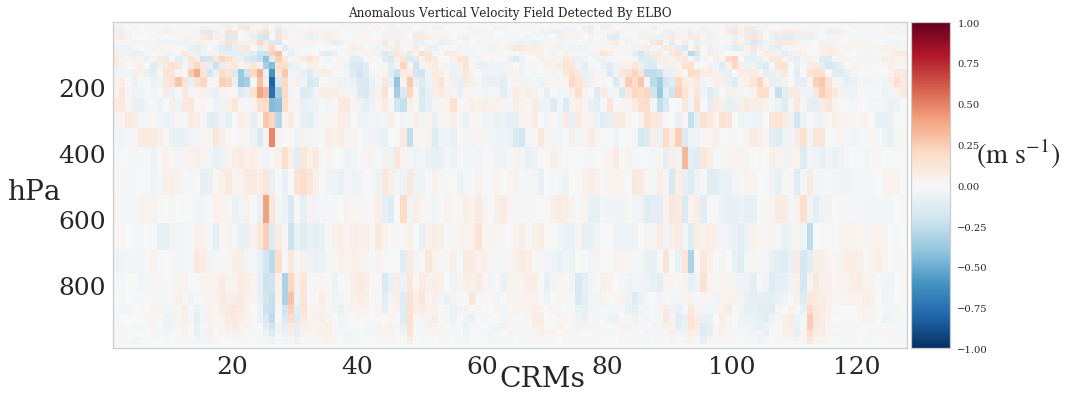

14


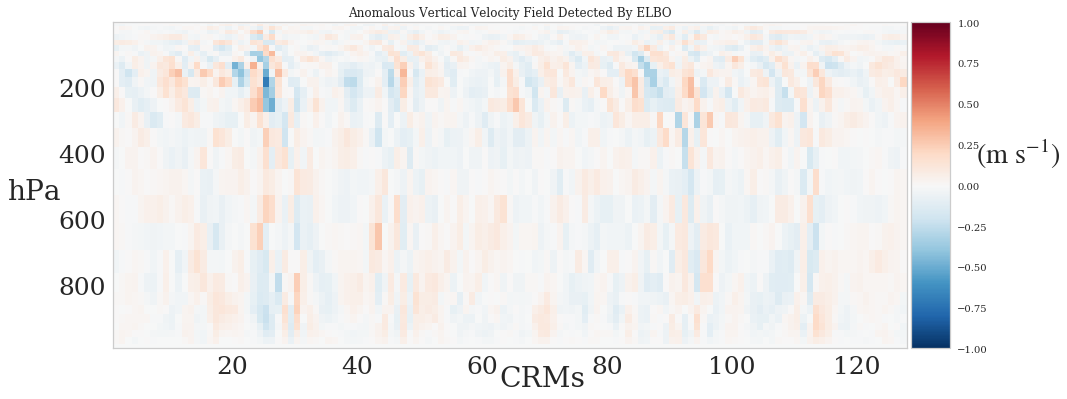

15


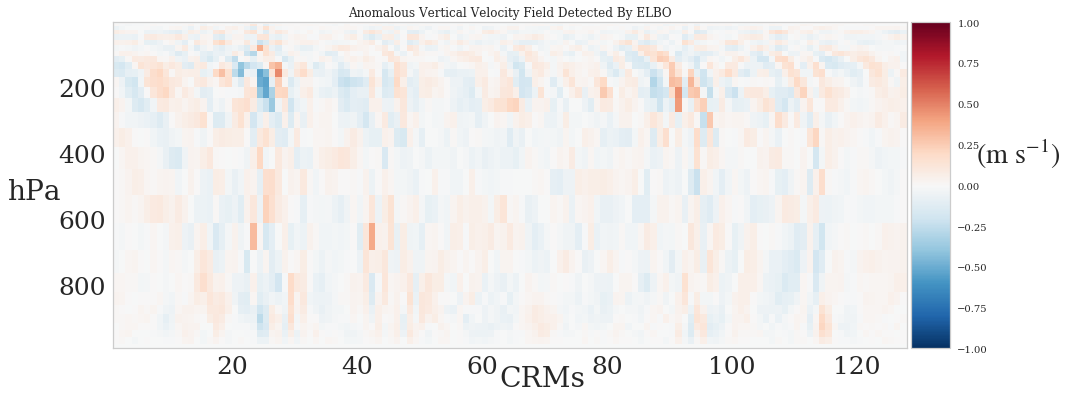

16


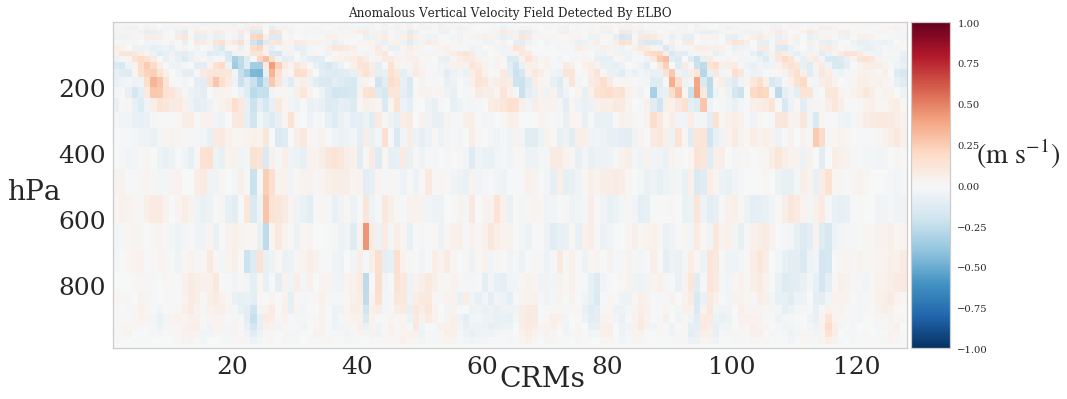

17


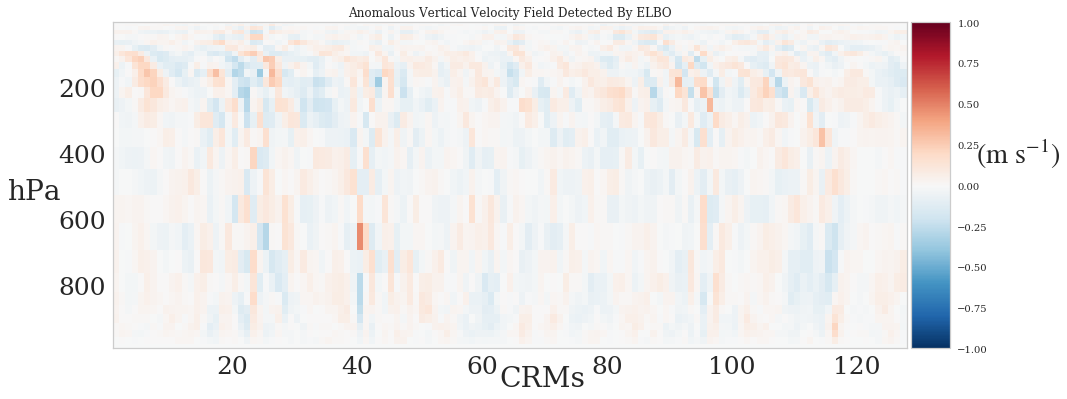

18


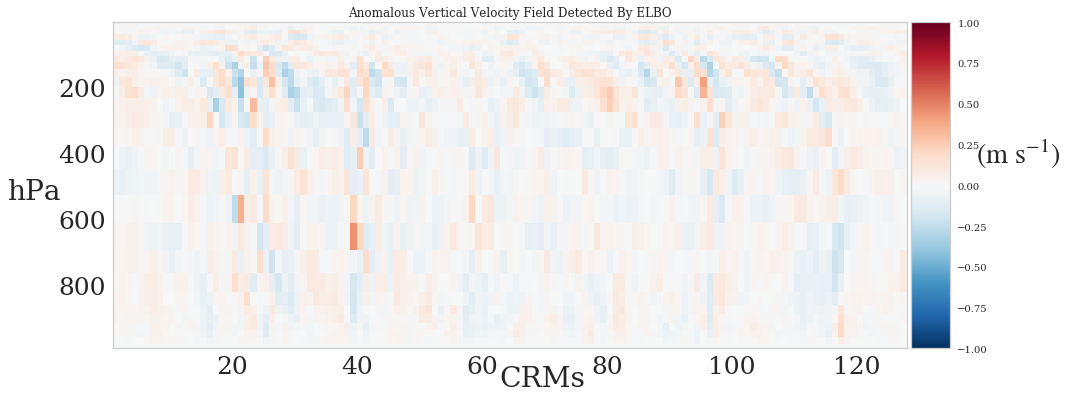

19


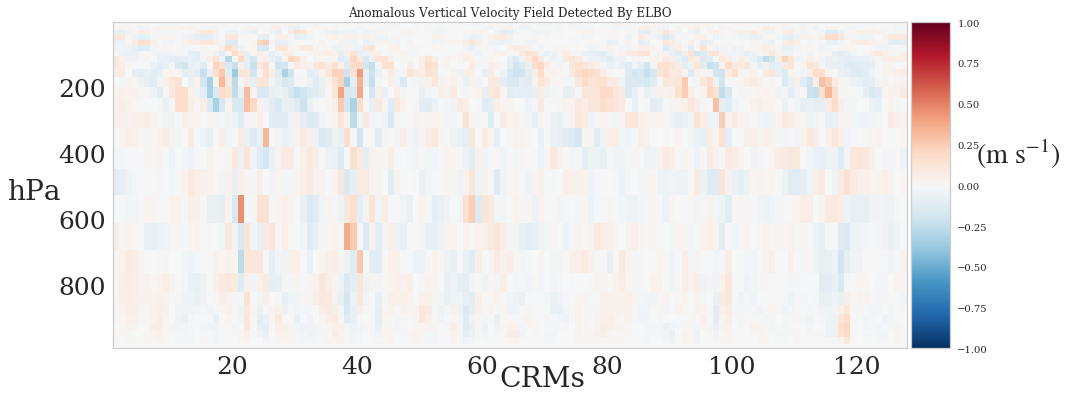

20


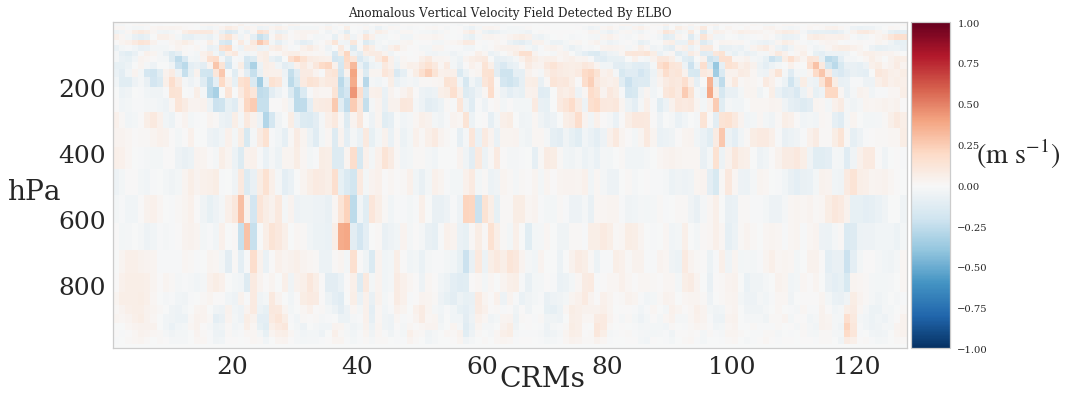

21


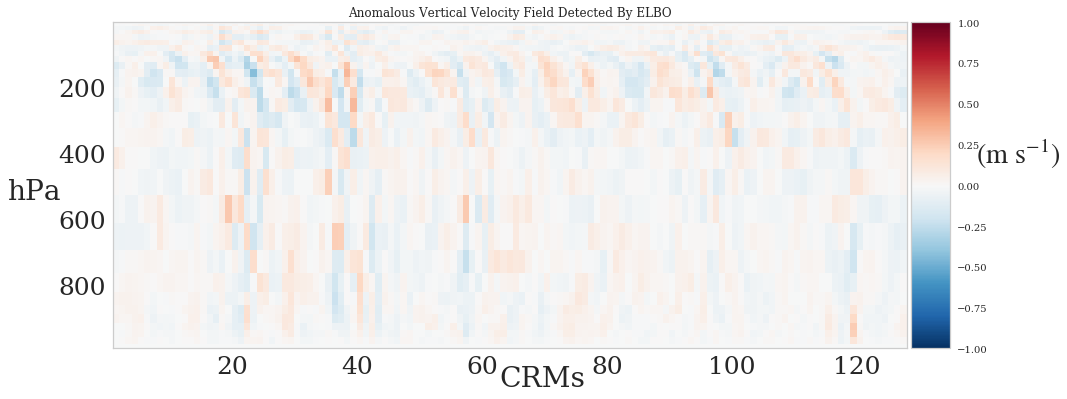

22


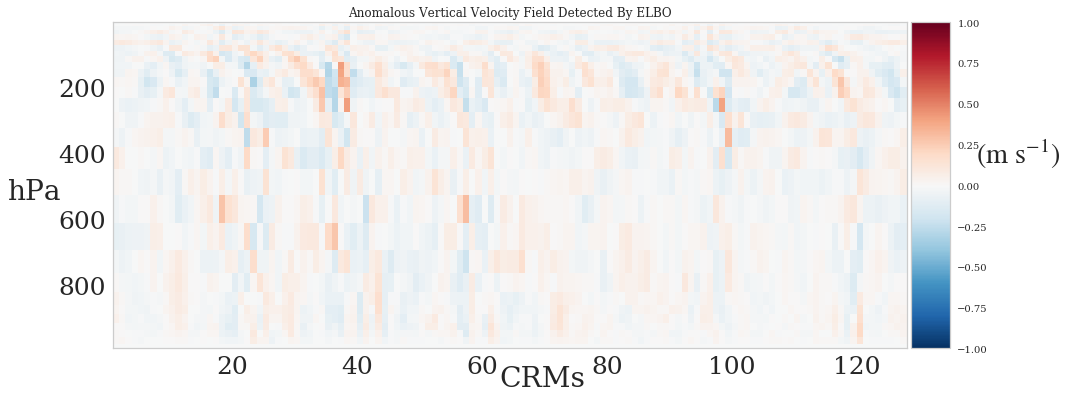

23


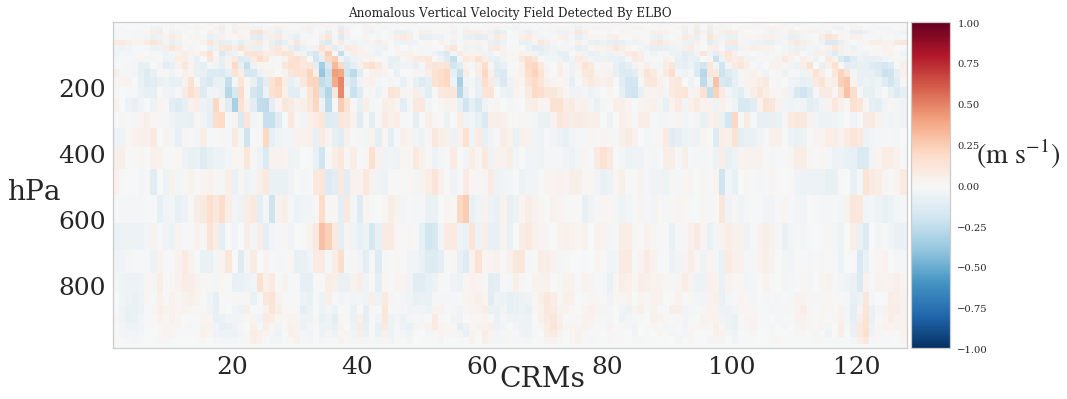

24


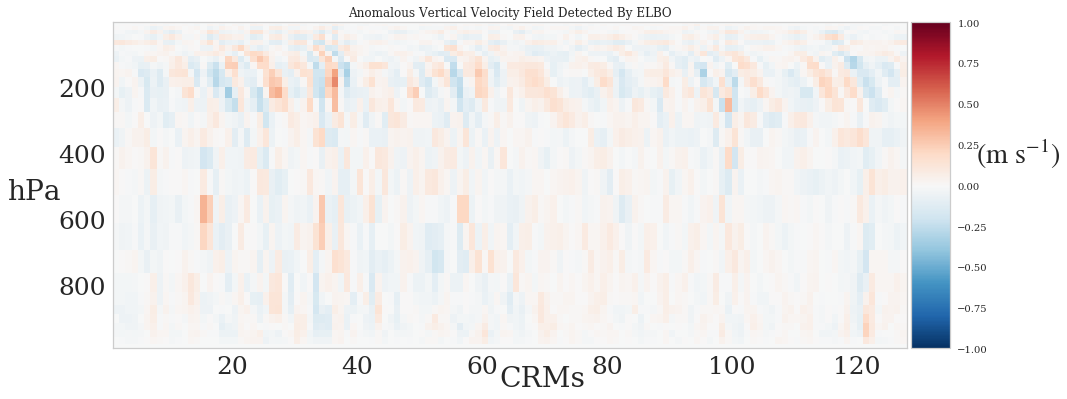

25


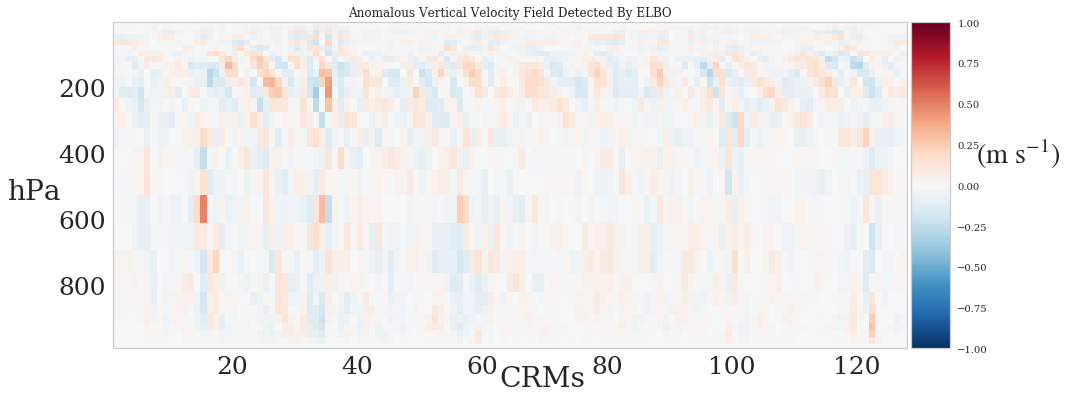

26


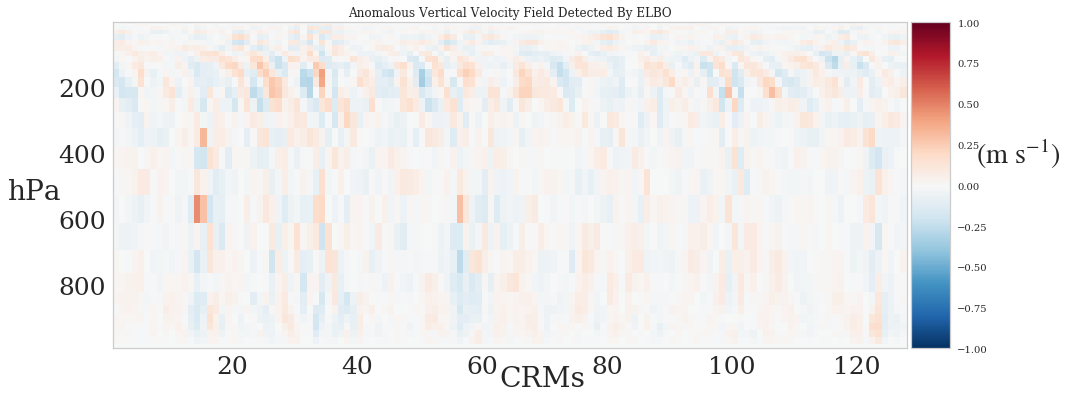

27


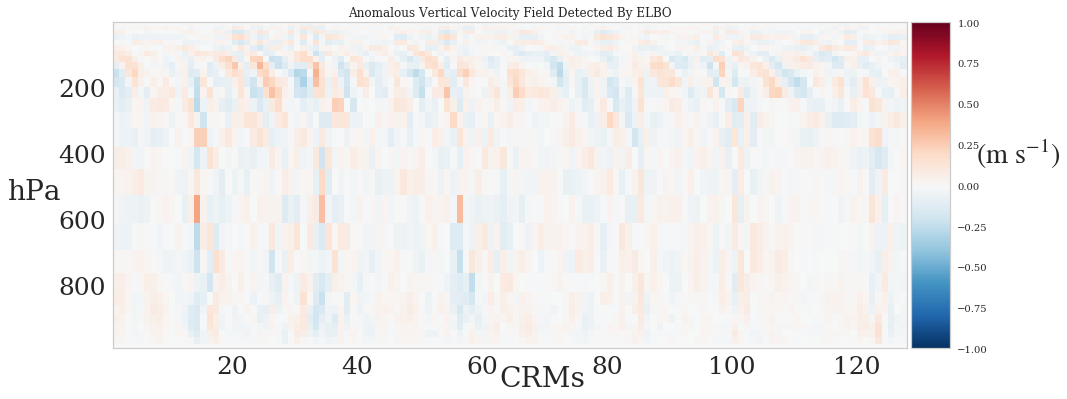

28


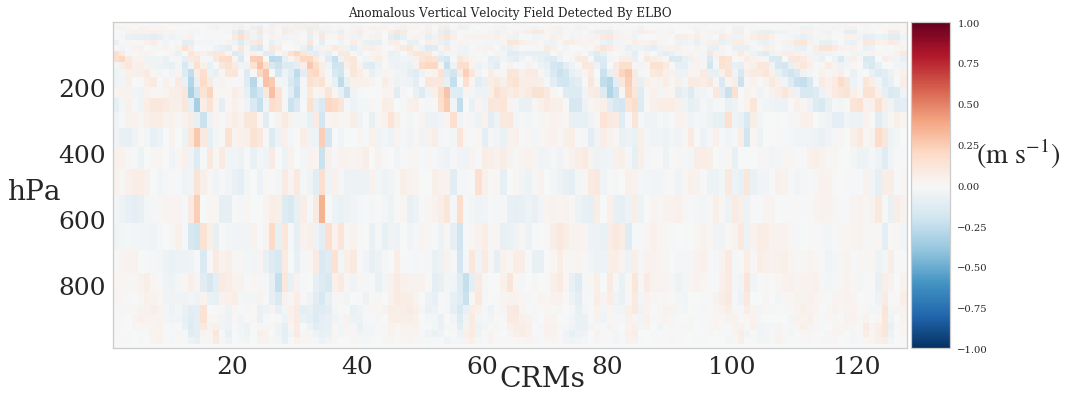

29


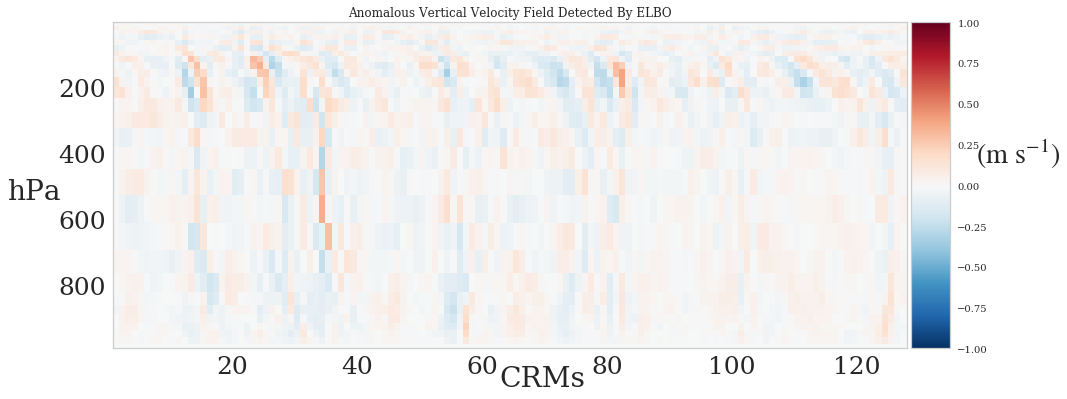

30


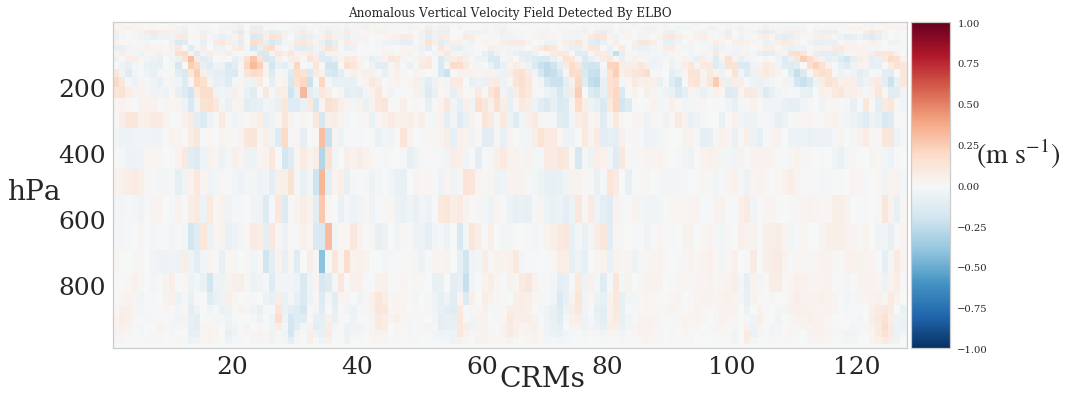

31


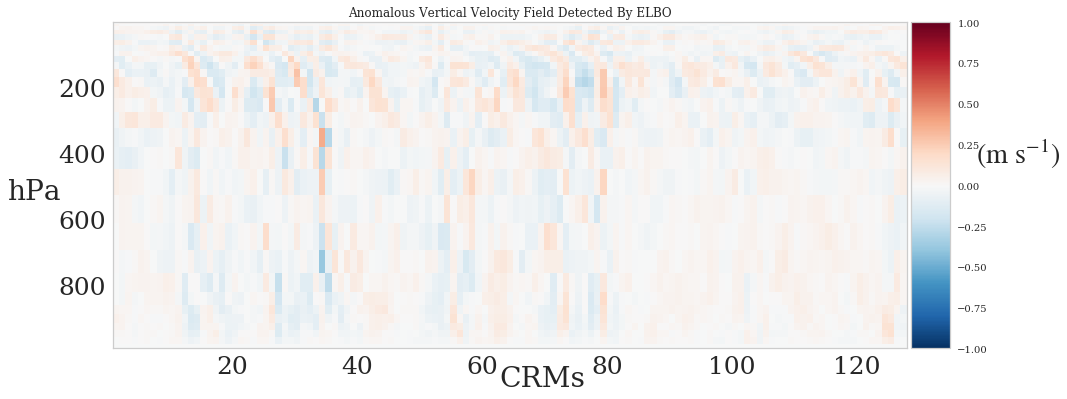

32


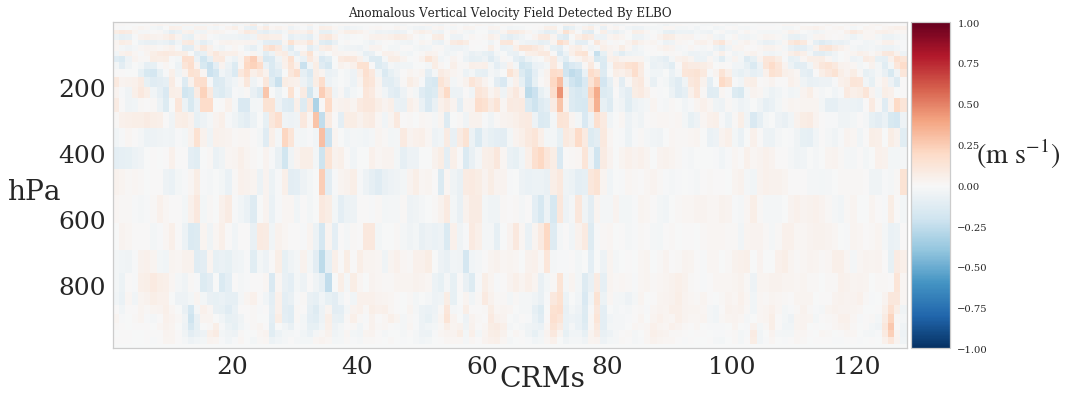

33


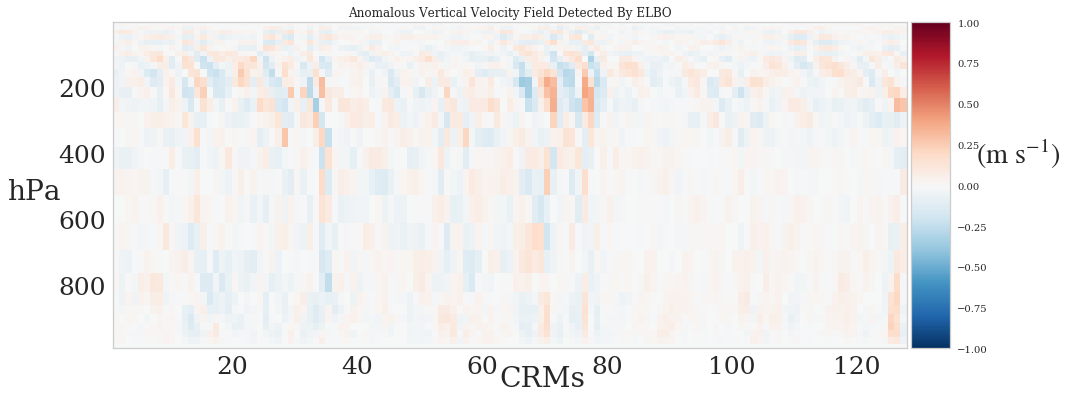

34


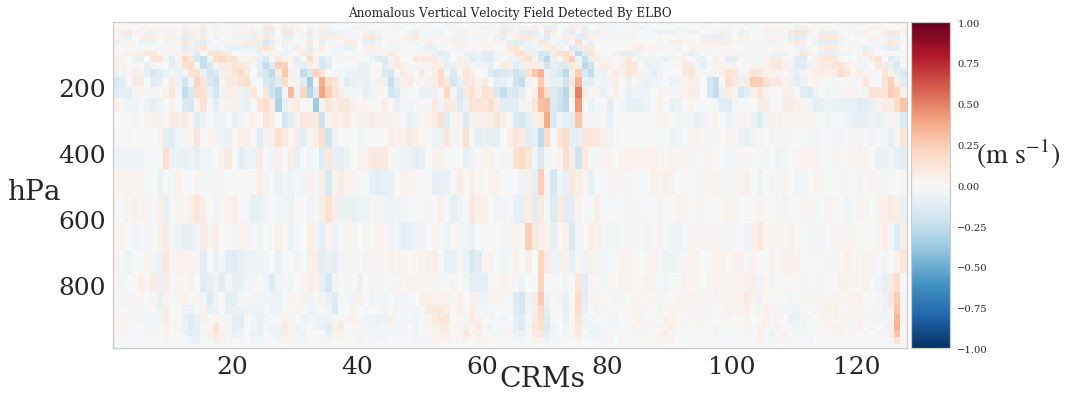

35


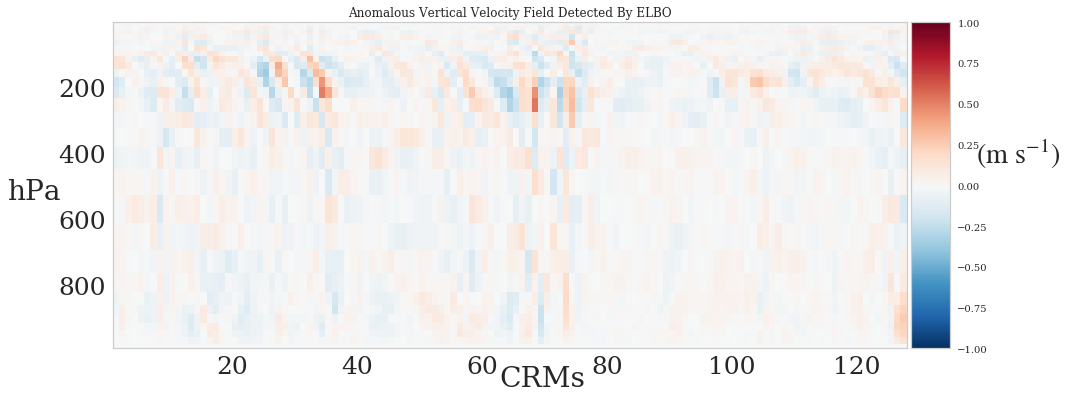

36


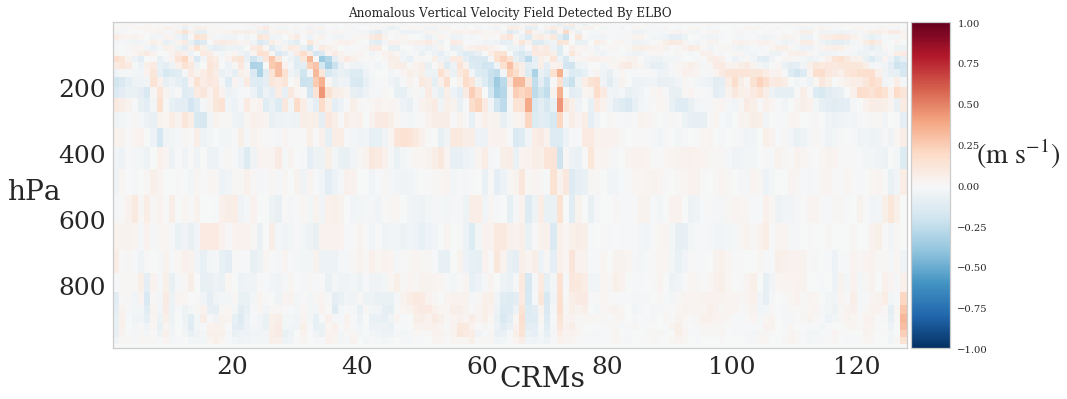

37


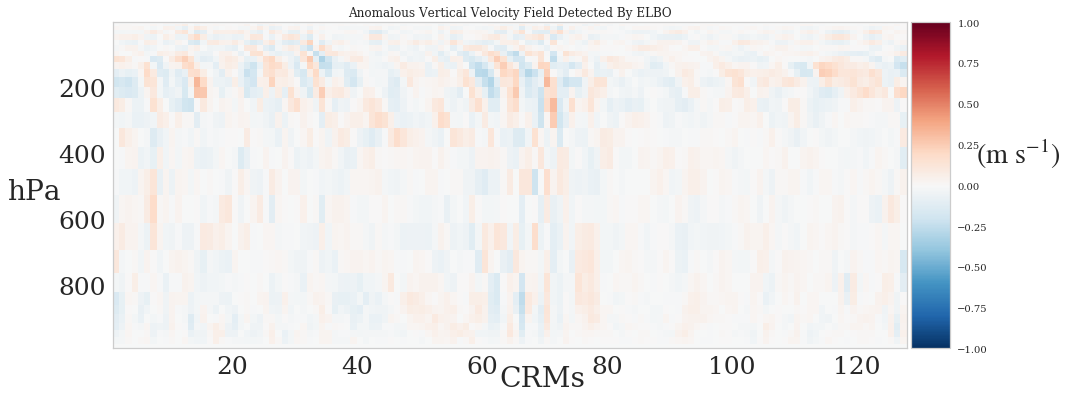

38


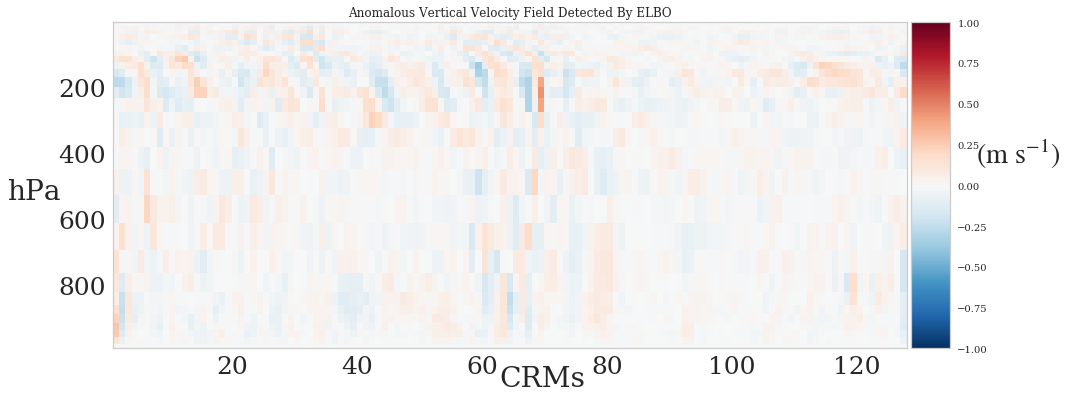

39


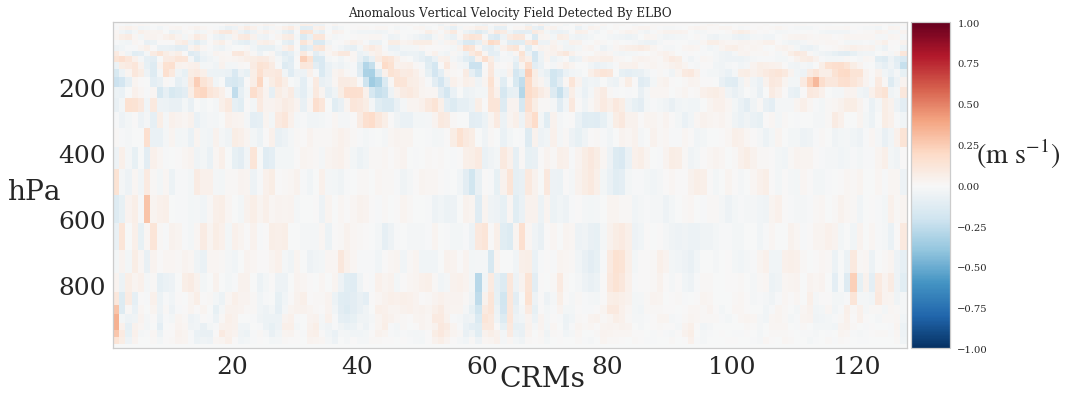

40


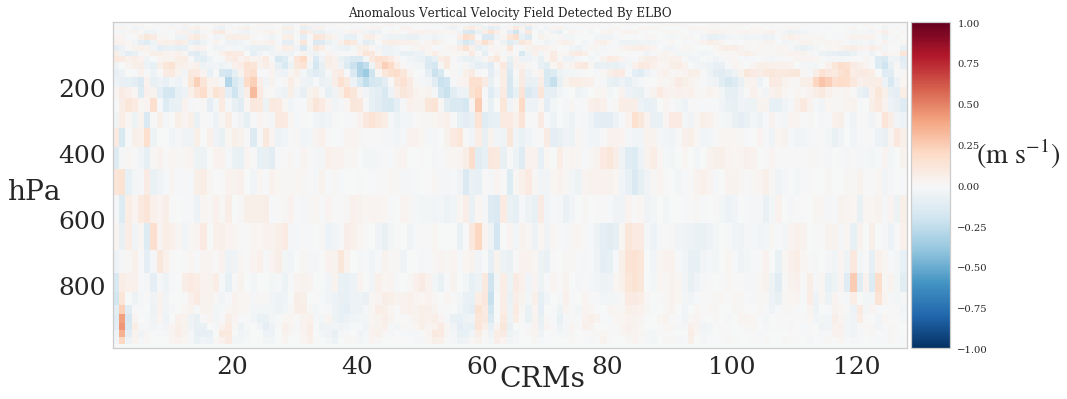

41


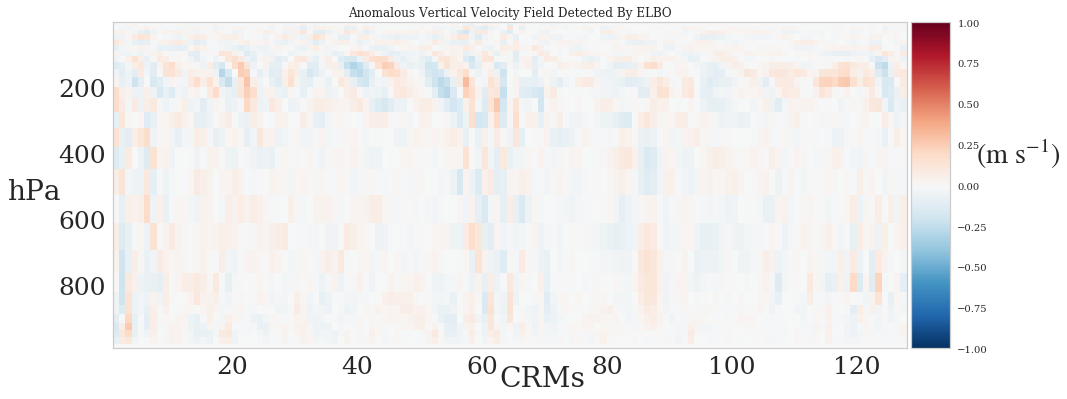

42


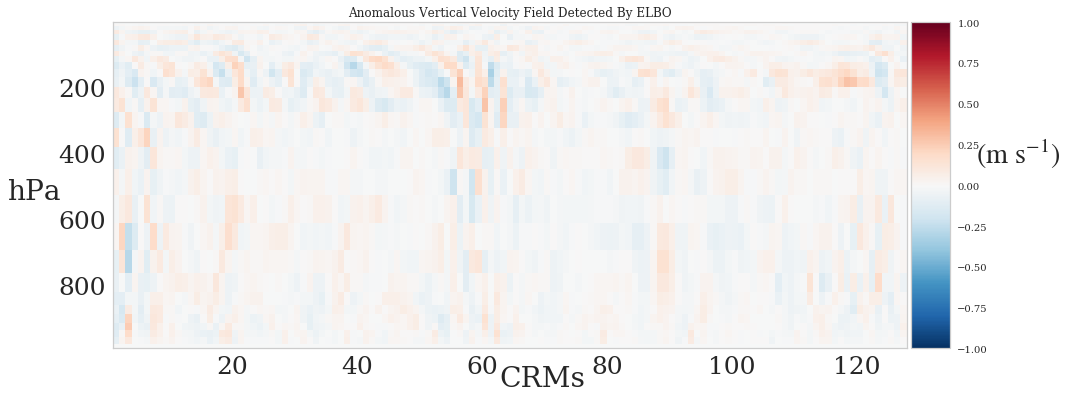

43


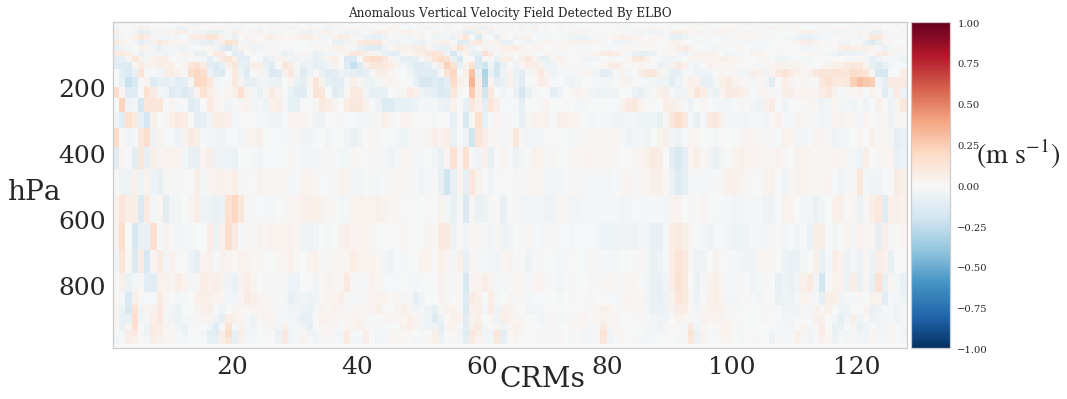

44


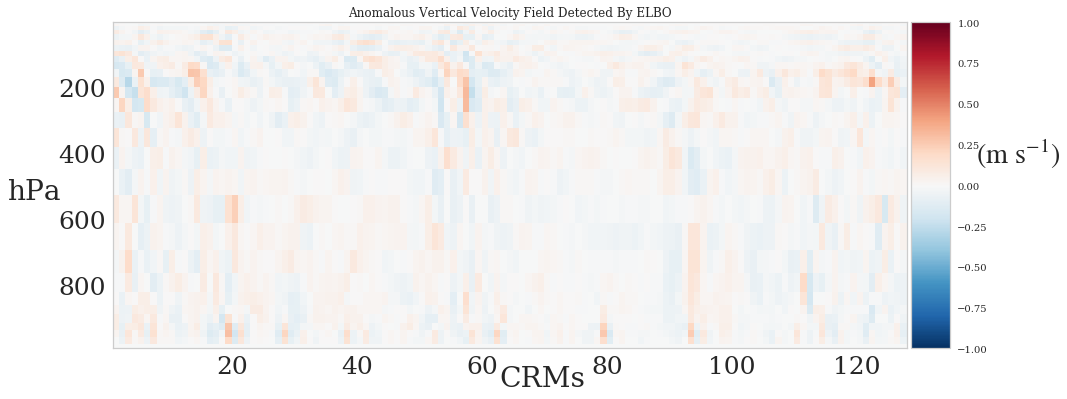

45


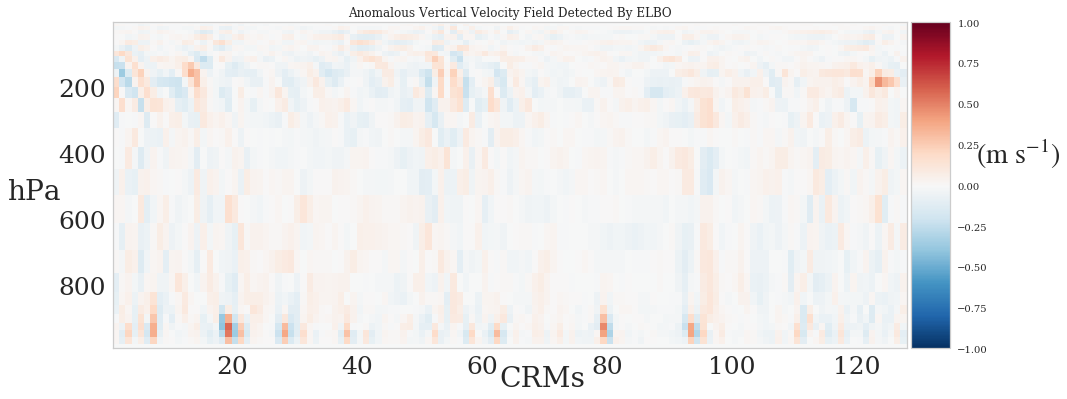

46


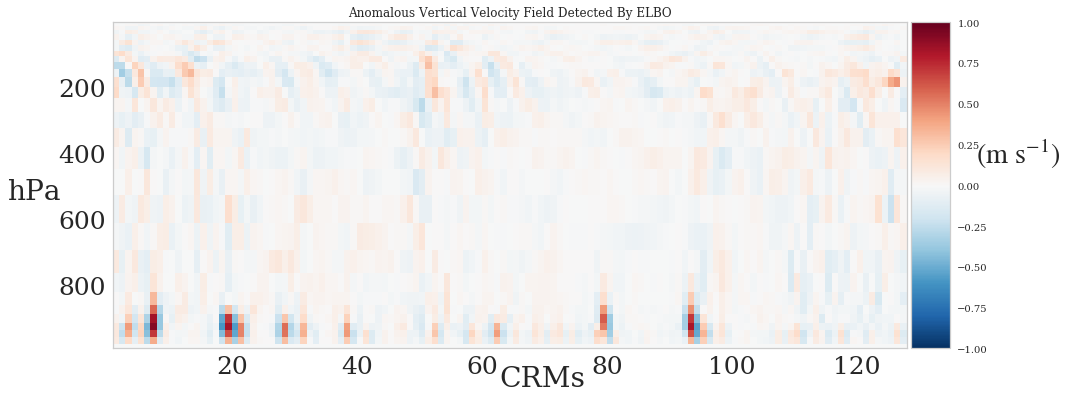

47


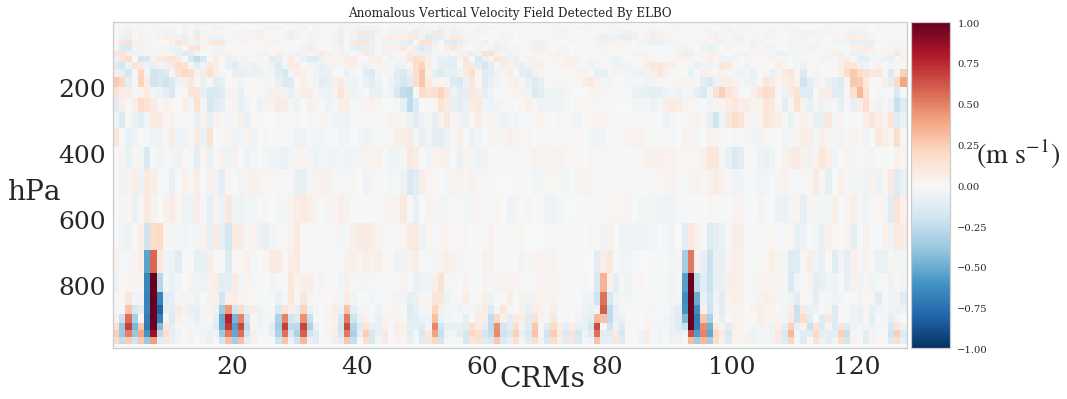

48


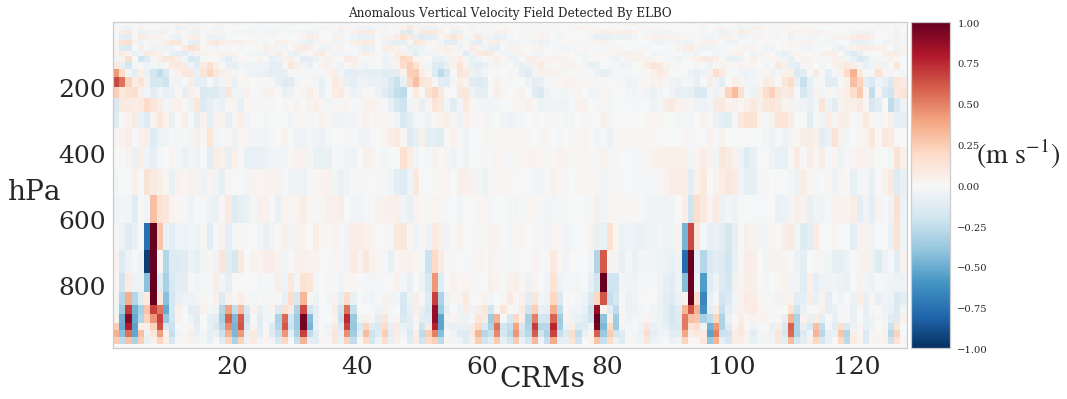

49


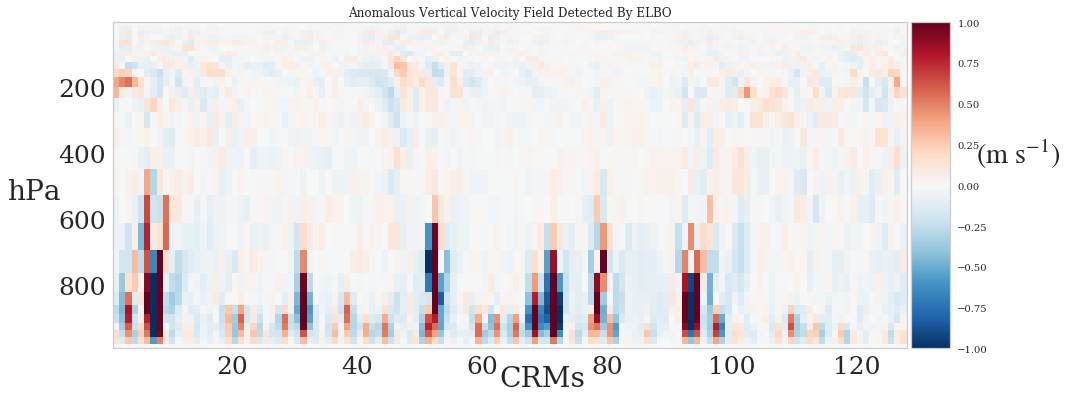

50


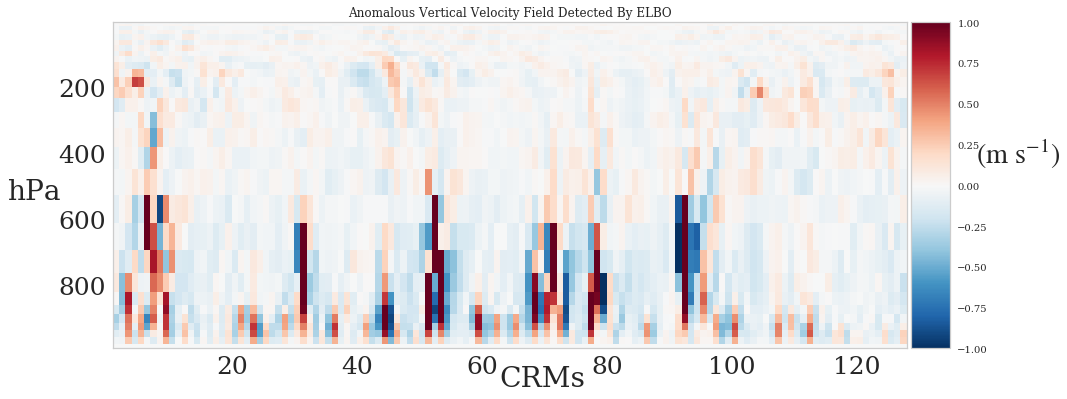

51


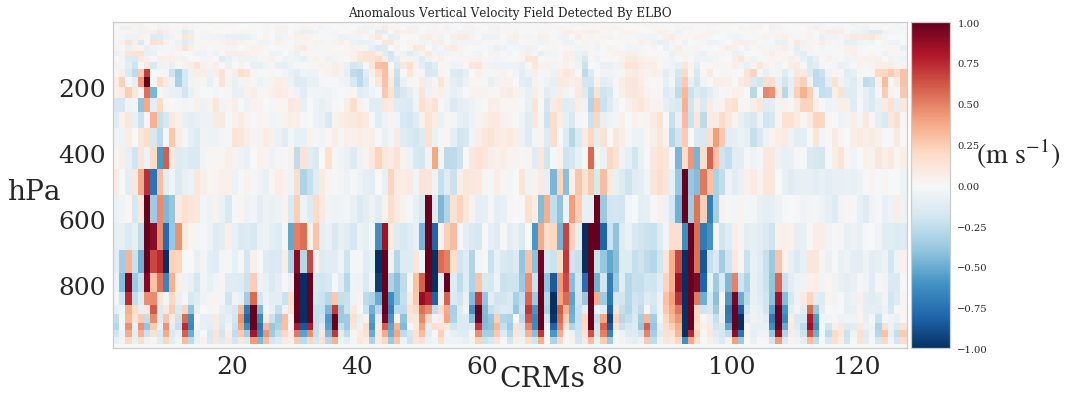

52


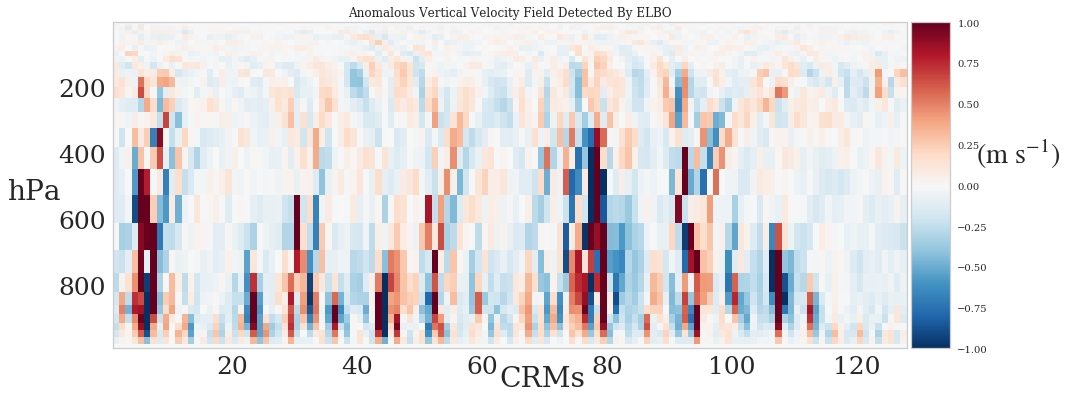

53


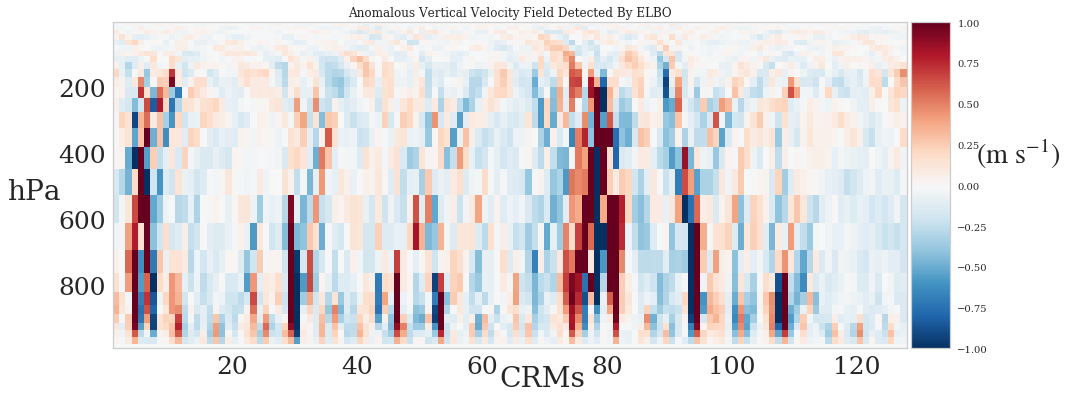

54


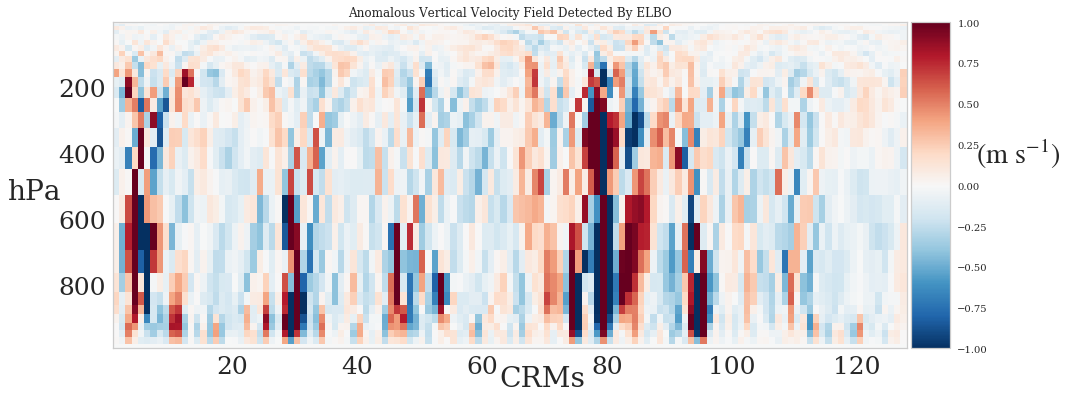

55


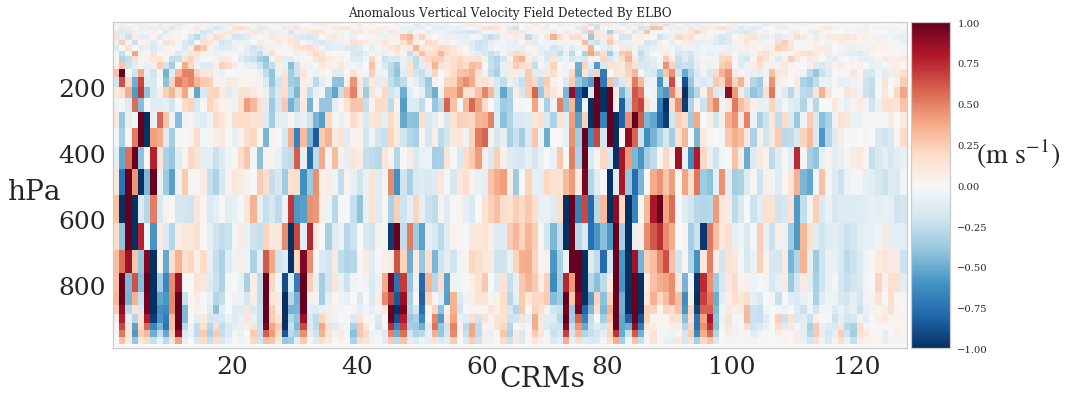

56


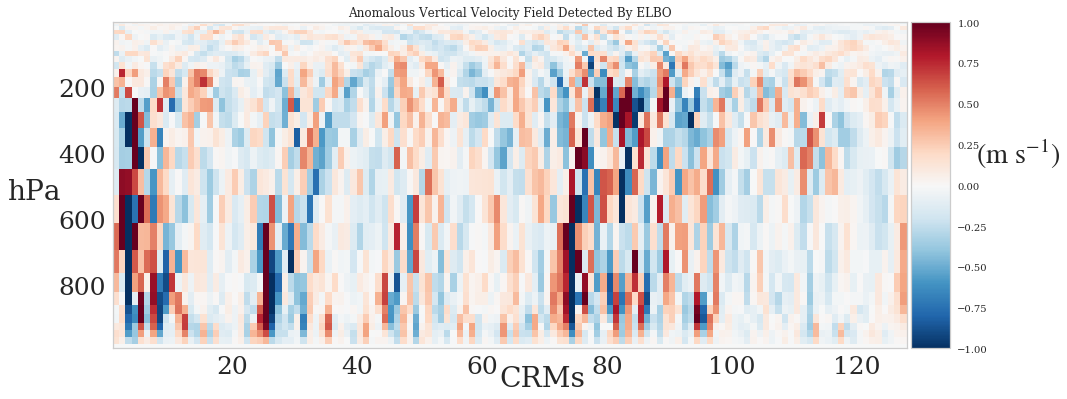

57


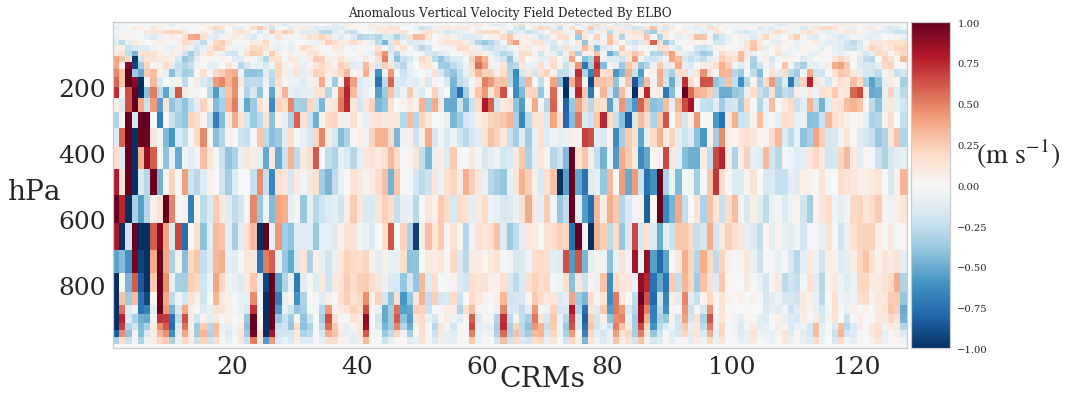

58


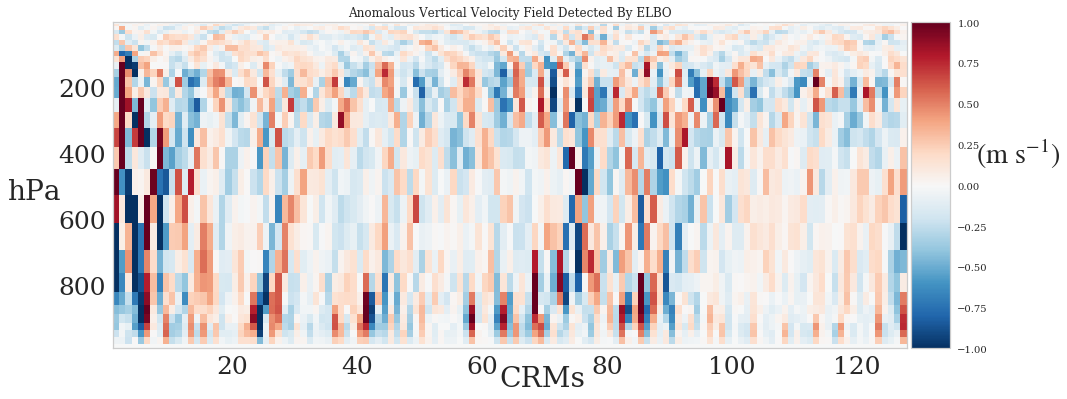

59


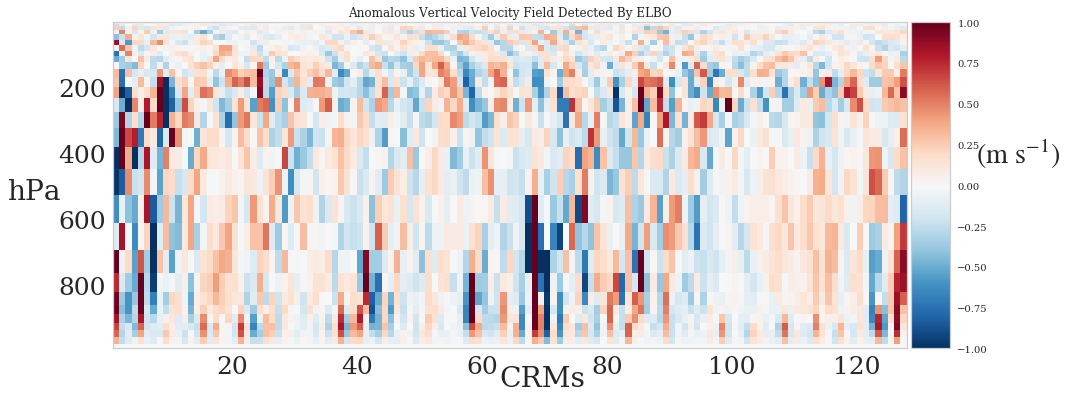

60


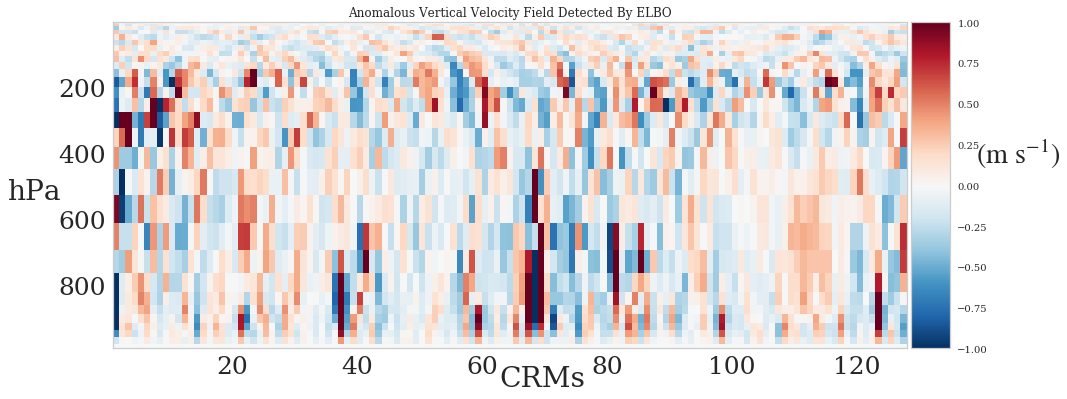

61


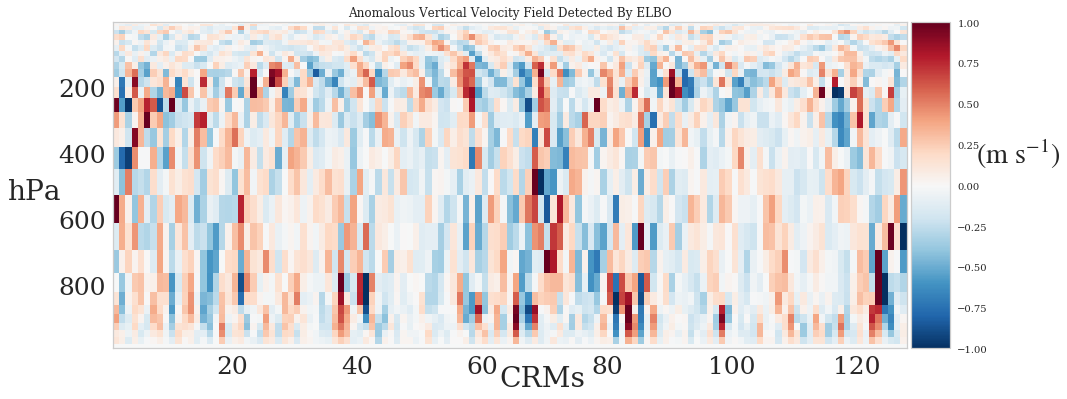

62


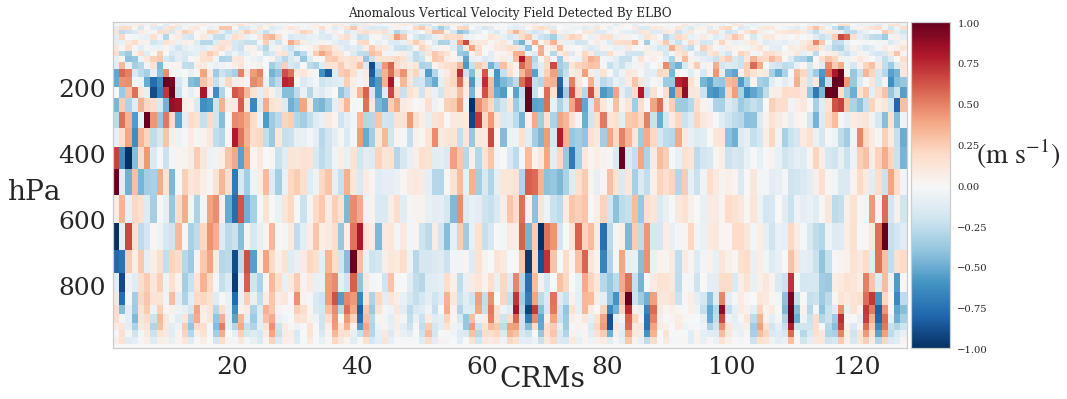

63


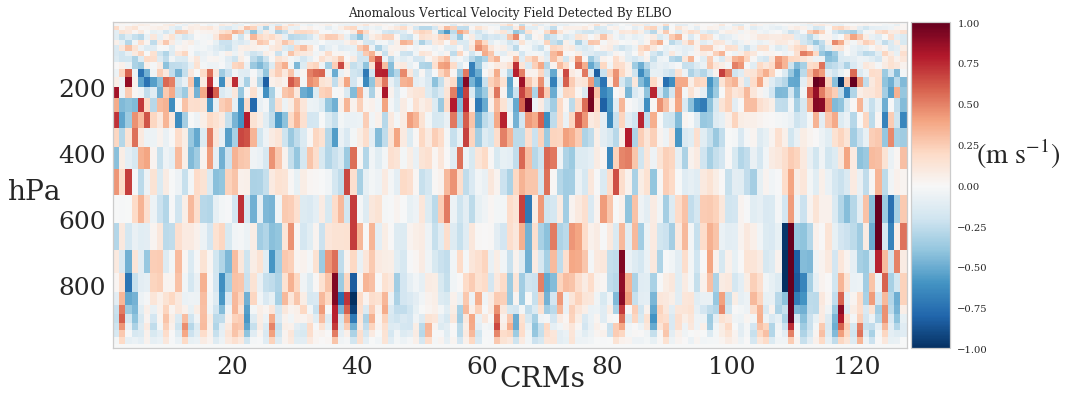

64


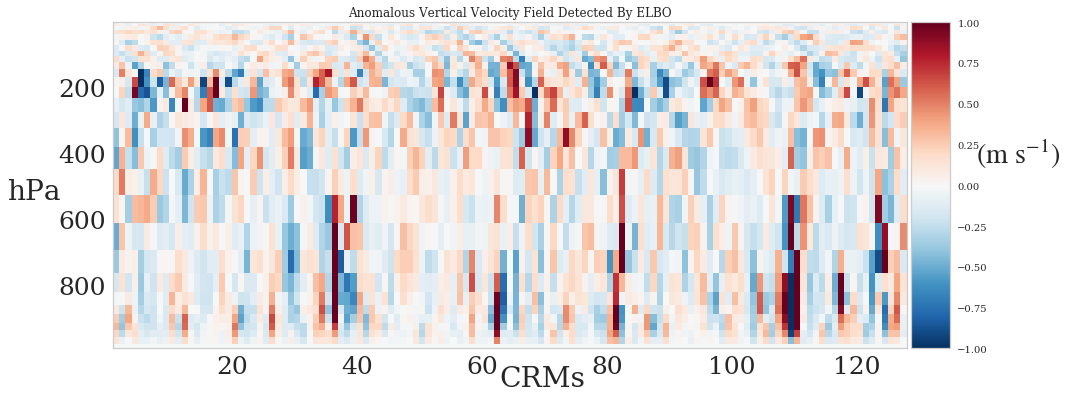

65


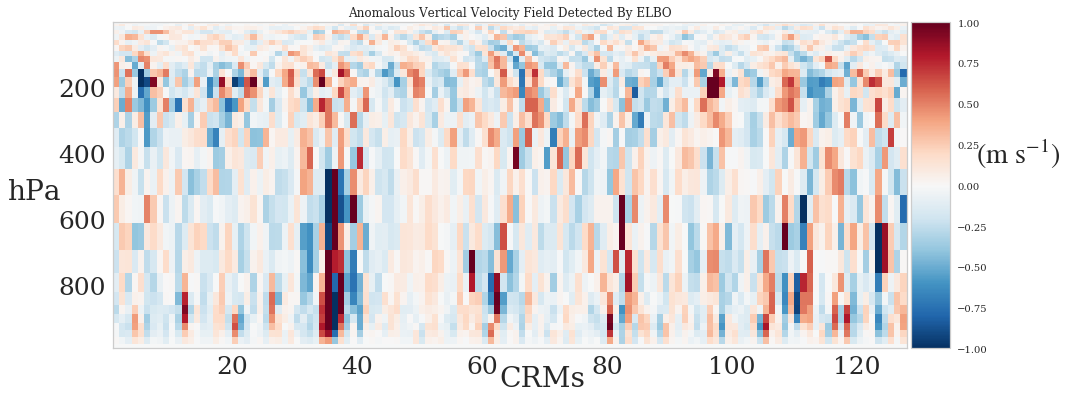

66


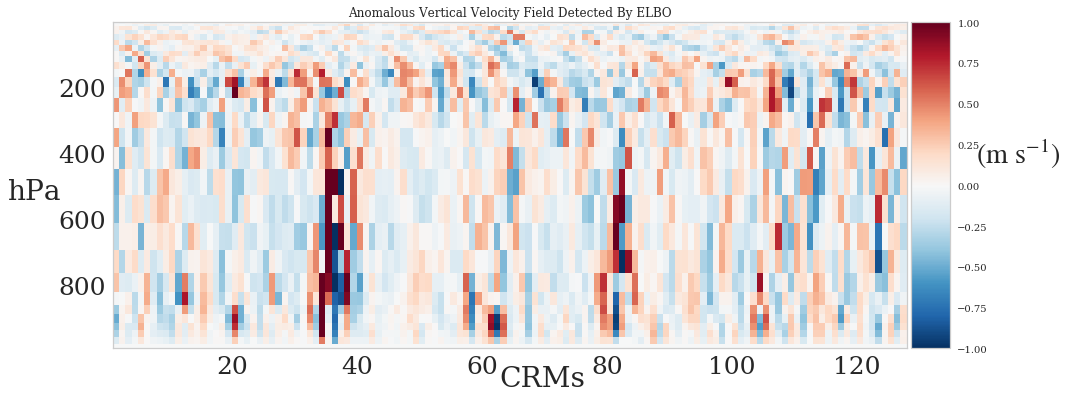

67


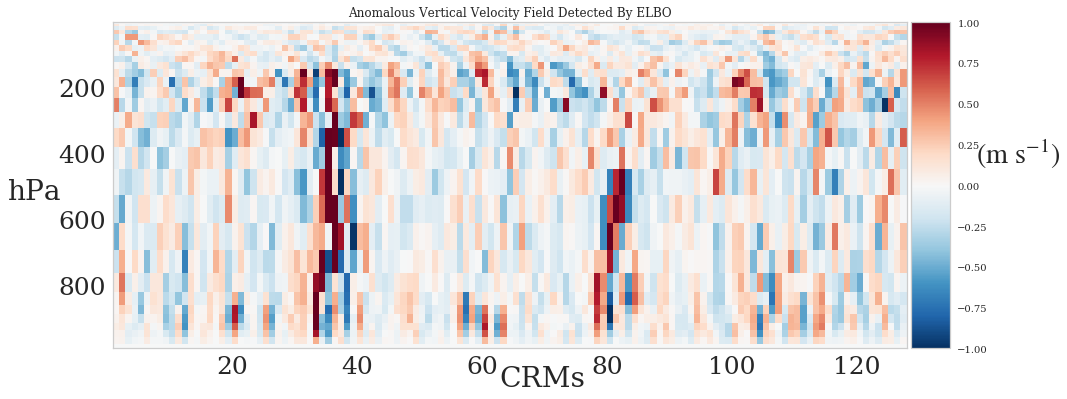

68


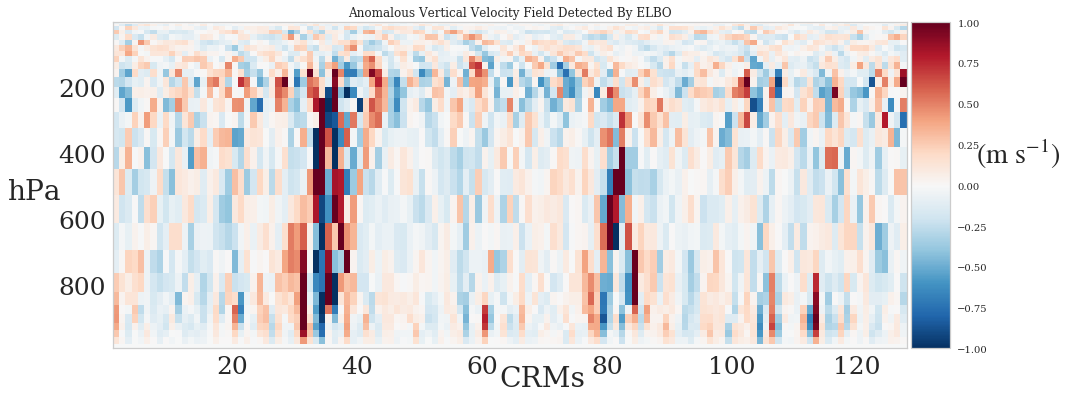

69


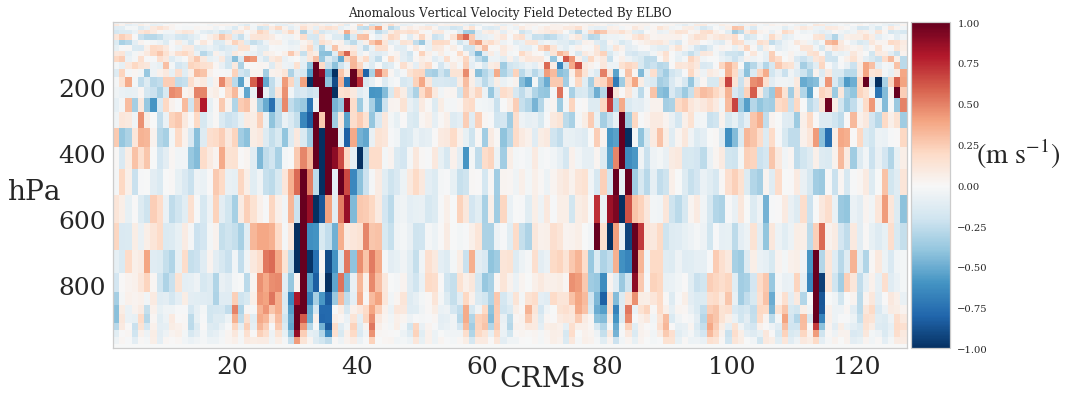

70


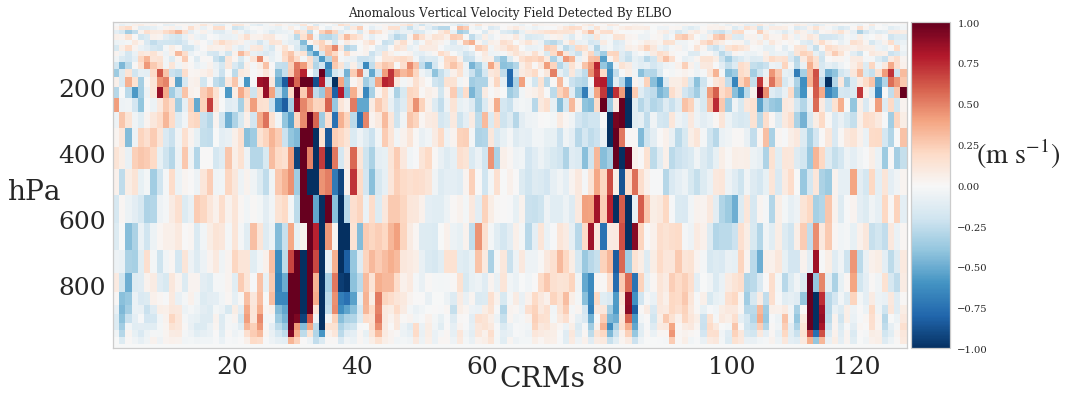

71


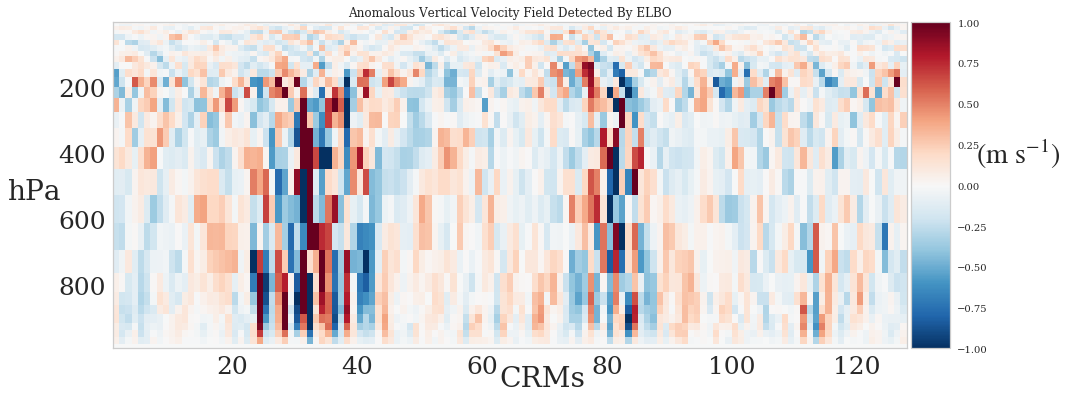

72


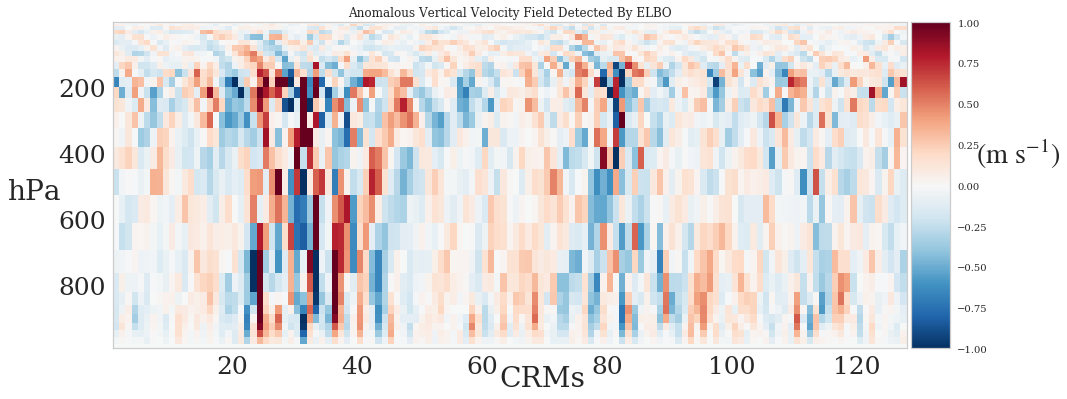

73


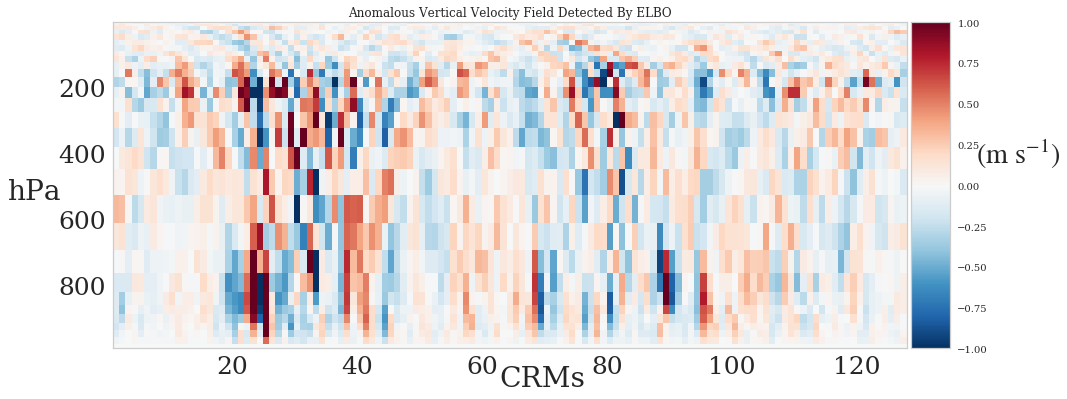

74


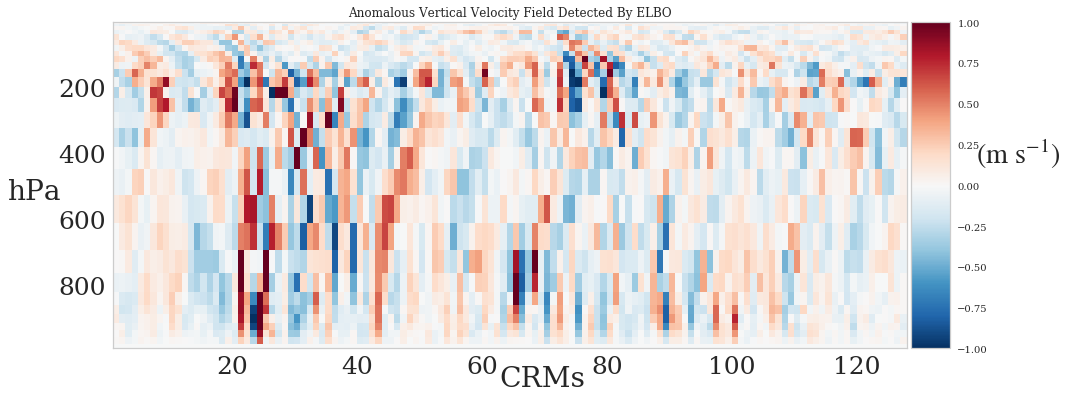

75


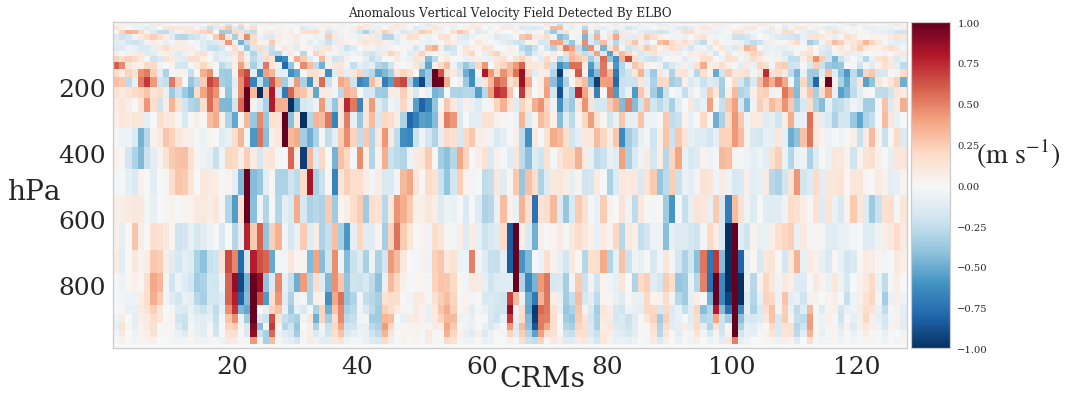

76


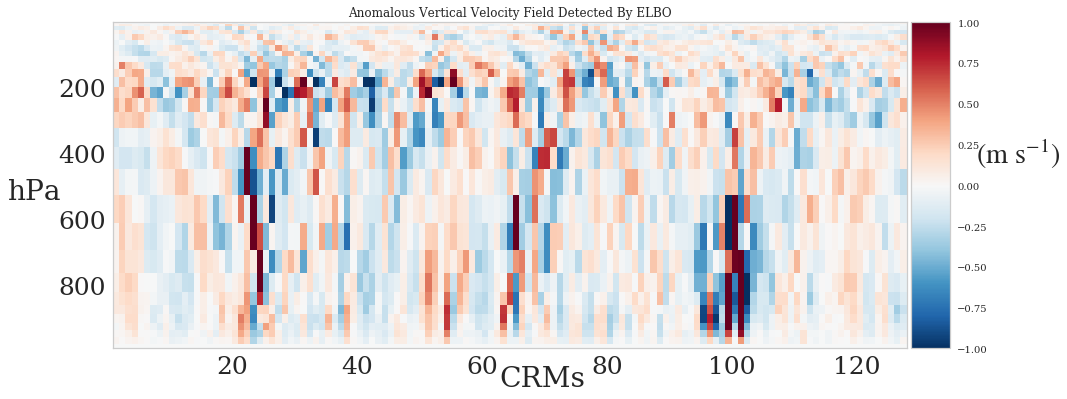

77


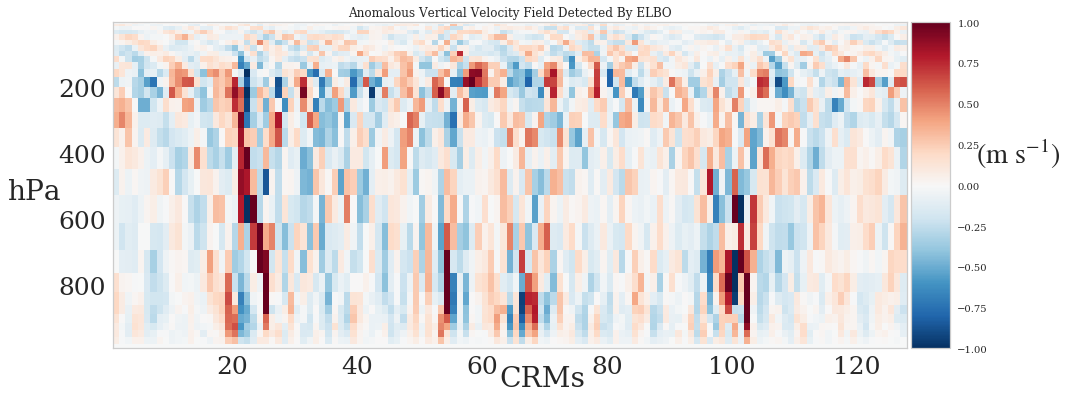

78


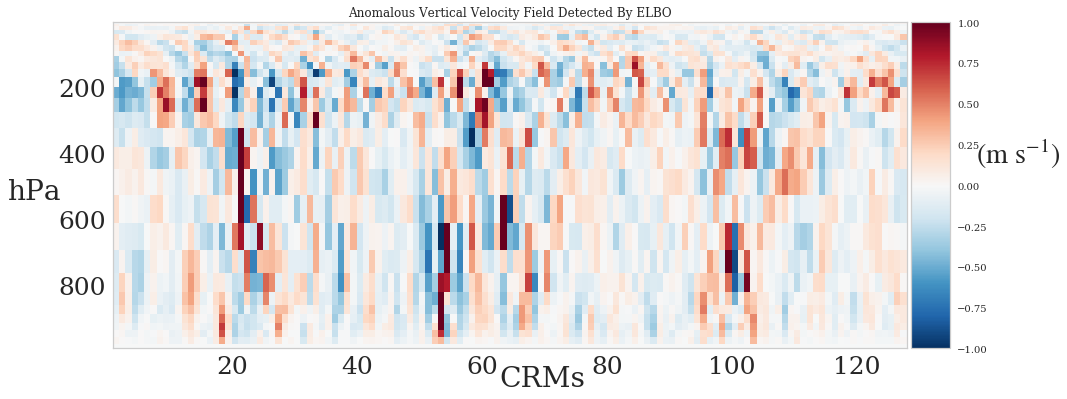

79


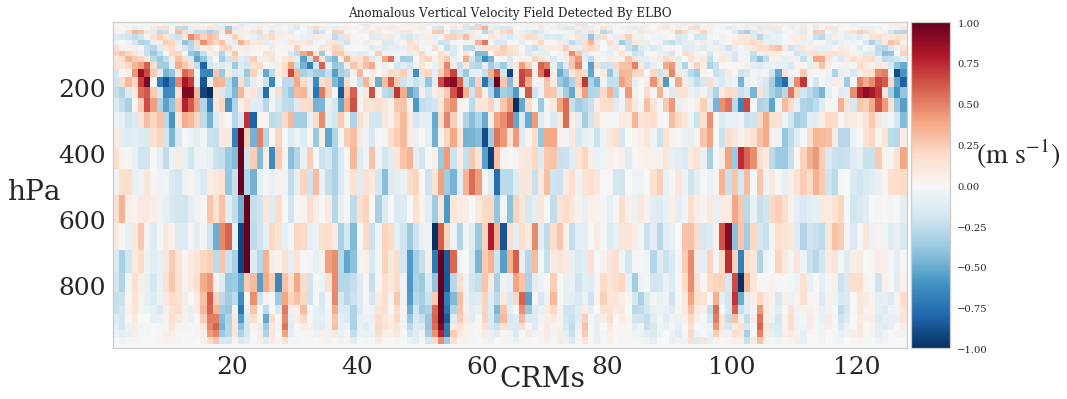

80


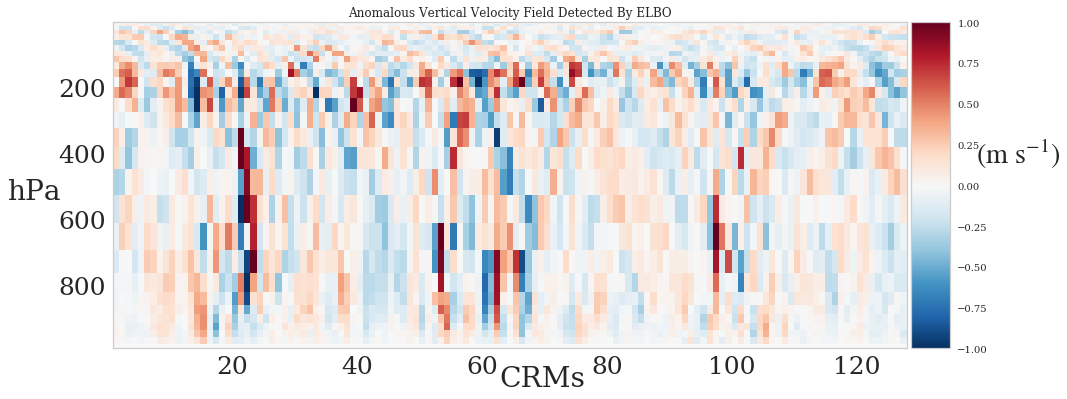

81


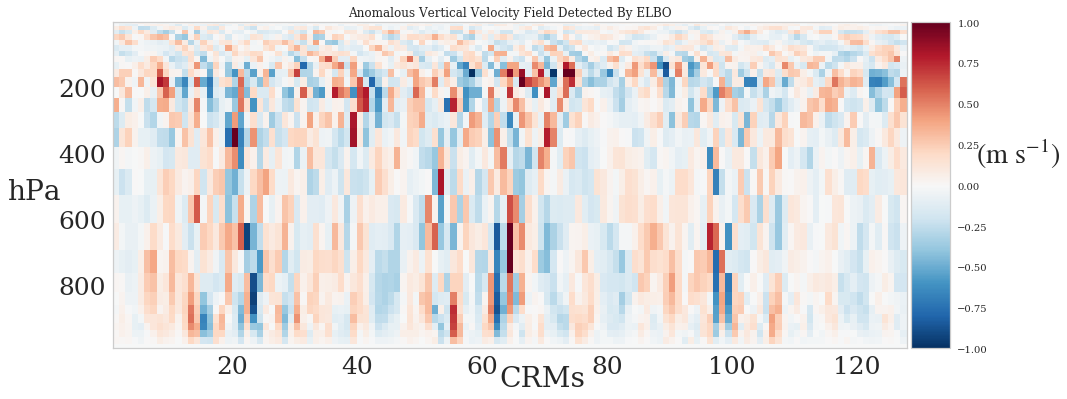

82


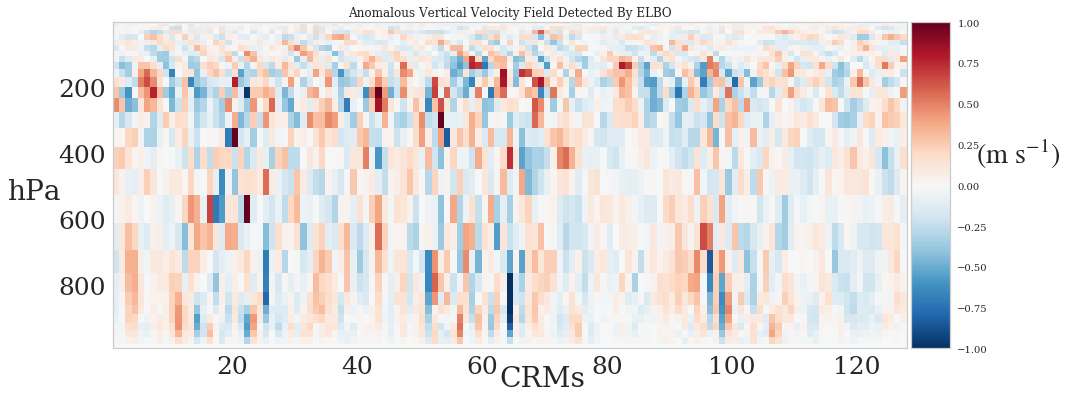

83


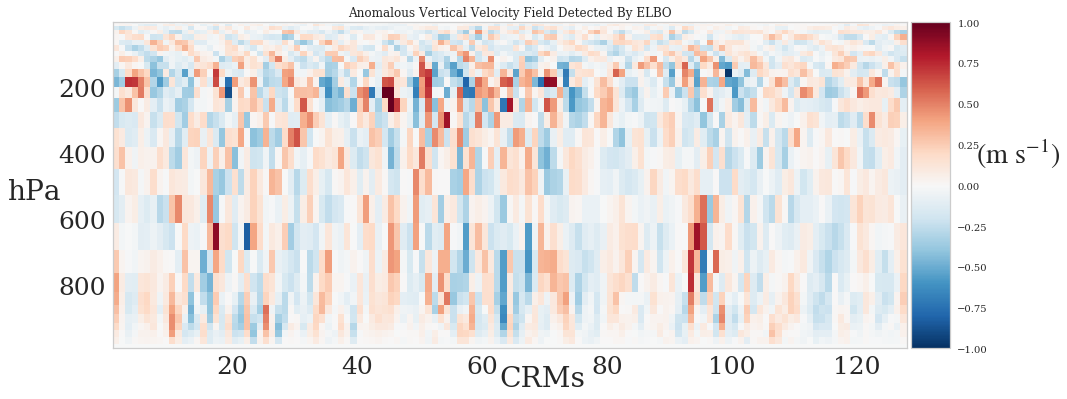

84


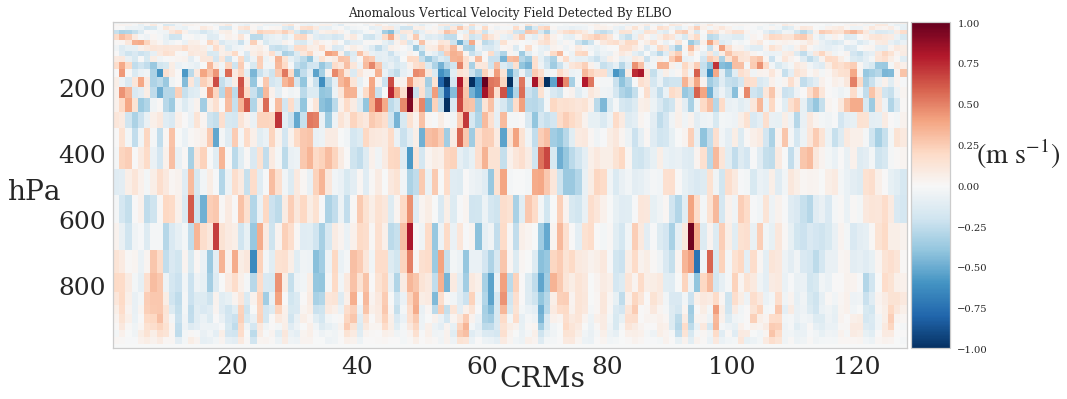

85


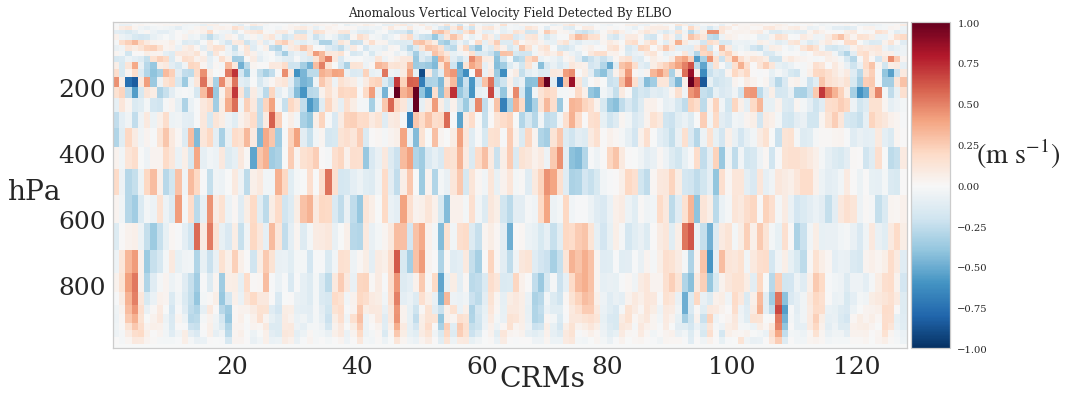

86


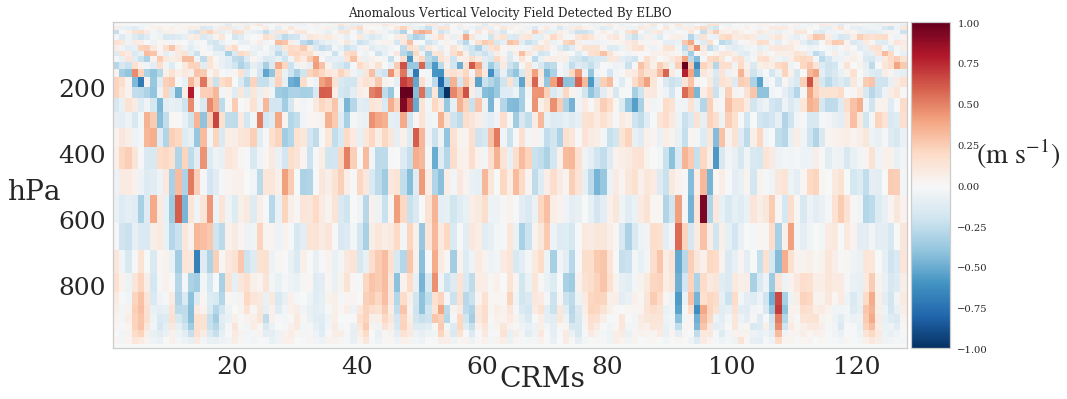

87


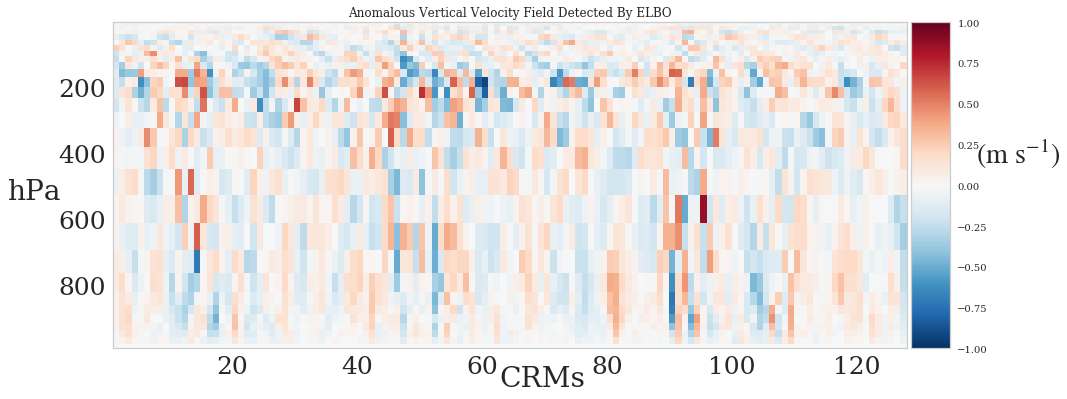

88


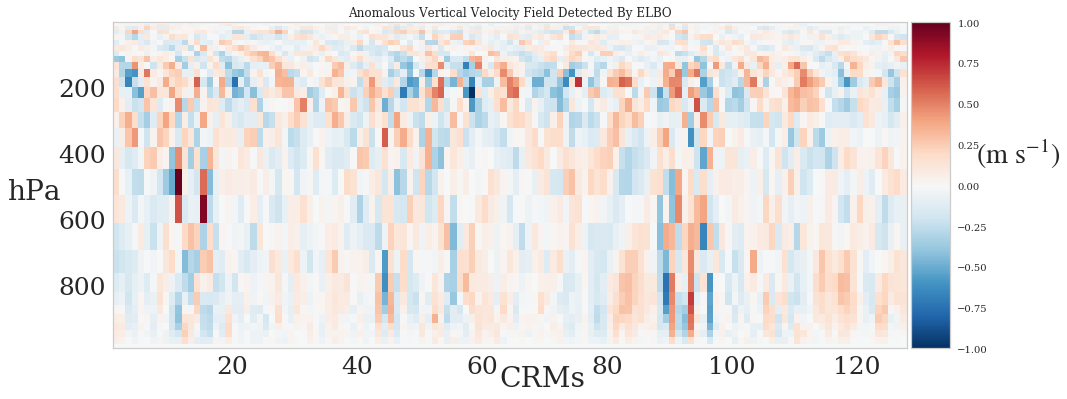

89


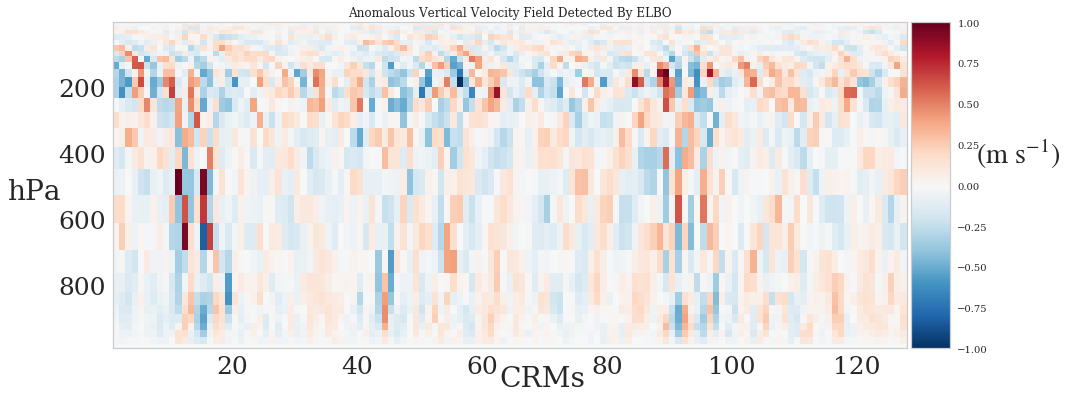

90


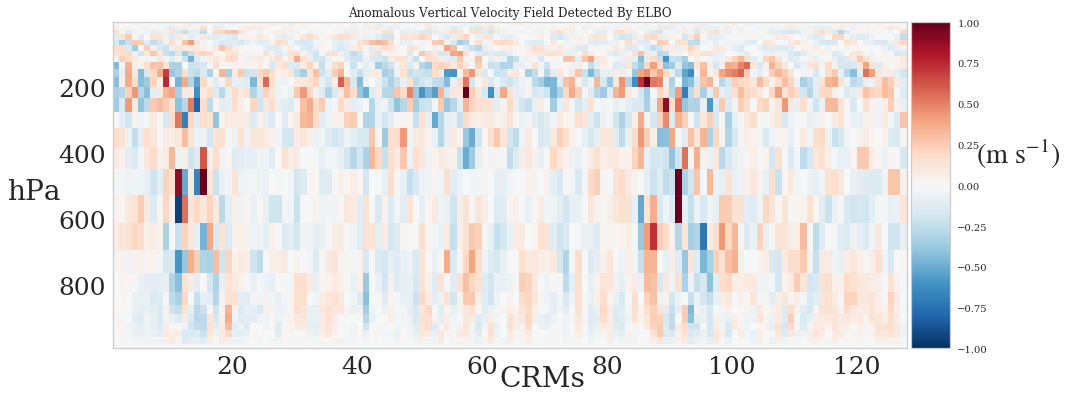

91


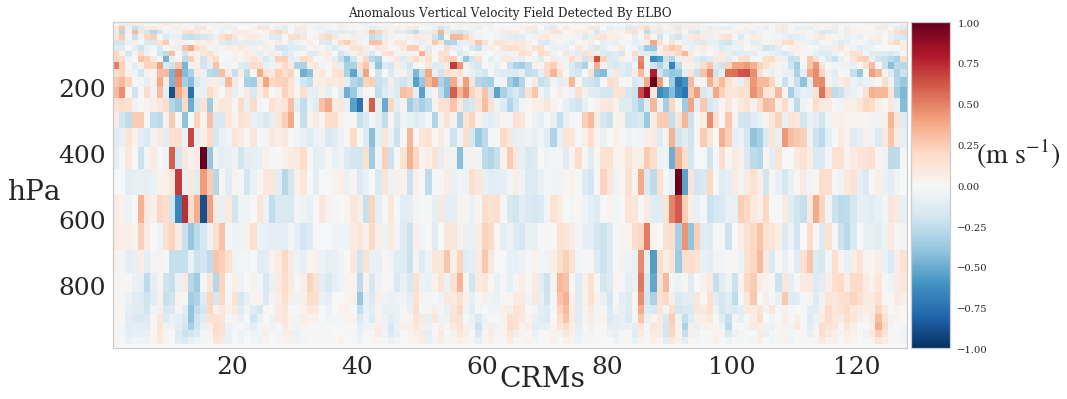

92


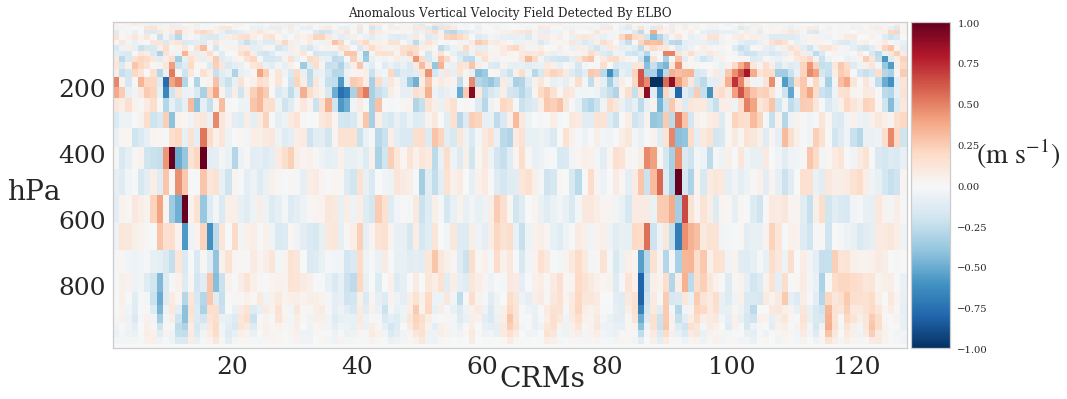

93


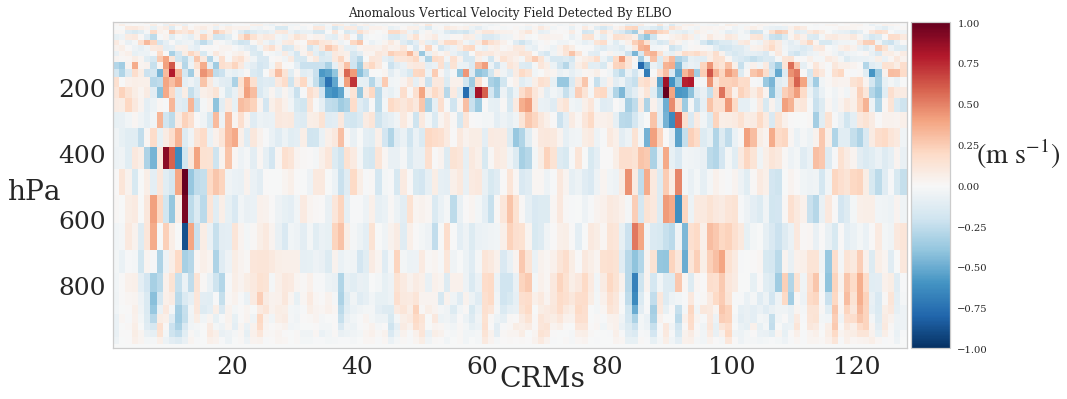

94


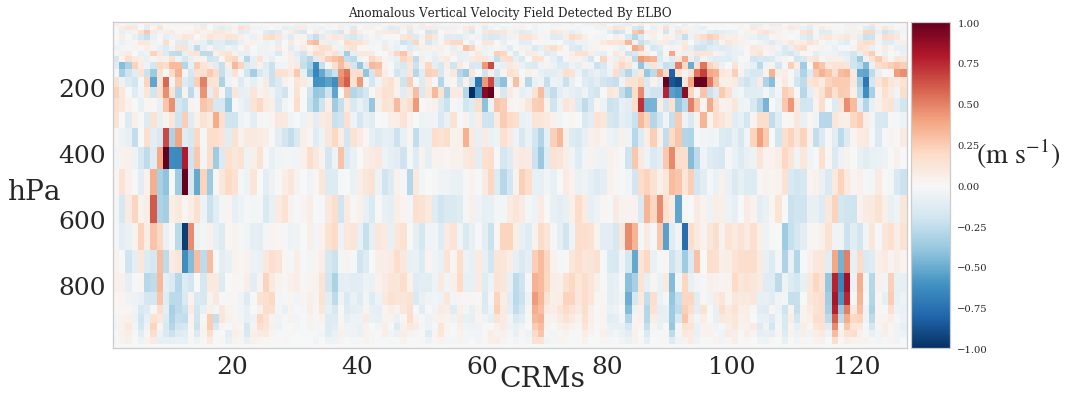

95


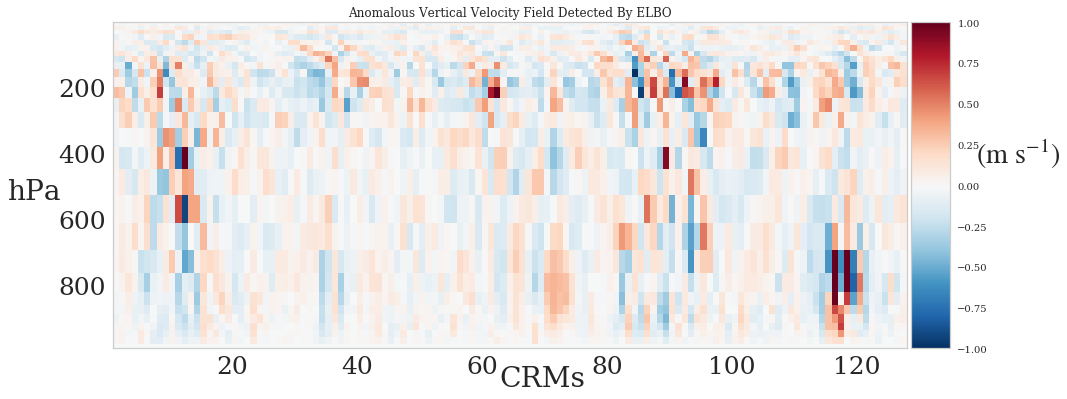

96


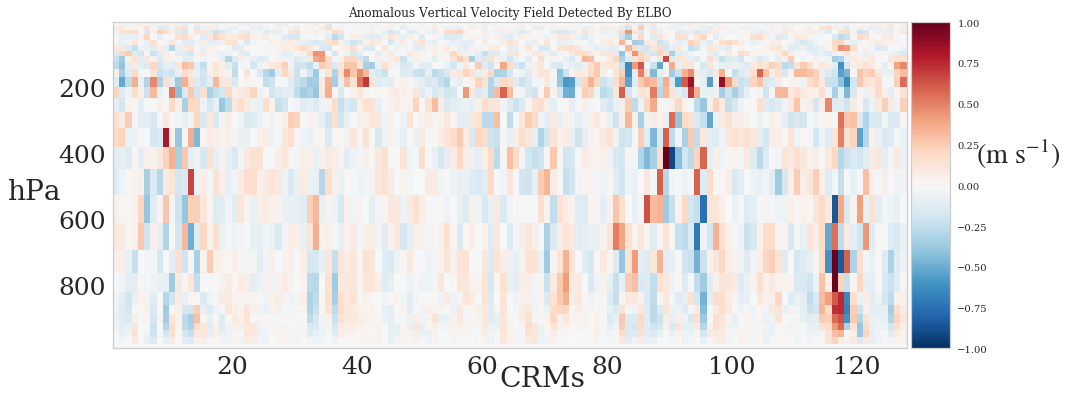

In [41]:
for i in range(96):
    print(i+1)
    plot_generator_paper(np.squeeze(Test_Images[i,:,:]), Xs, Zs)

## Load in interpolations

In [53]:
interpolated_orig_images_50_51 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_50_51.npy")
latent_interpolated_images_50_51 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_50_51.npy")
reconstructed_Image_finals_50_51 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_50_51.npy")
Interpolated_orig_images_50_51 = np.interp(interpolated_orig_images_50_51, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_50_51 = np.interp(reconstructed_Image_finals_50_51, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_51_52 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_51_52.npy")
latent_interpolated_images_51_52 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_51_52.npy")
reconstructed_Image_finals_51_52 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_51_52.npy")
Interpolated_orig_images_51_52 = np.interp(interpolated_orig_images_51_52, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_51_52 = np.interp(reconstructed_Image_finals_51_52, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_52_53 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_52_53.npy")
latent_interpolated_images_52_53 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_52_53.npy")
reconstructed_Image_finals_52_53 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_52_53.npy")
Interpolated_orig_images_52_53 = np.interp(interpolated_orig_images_52_53, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_52_53 = np.interp(reconstructed_Image_finals_52_53, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_53_54 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_53_54.npy")
latent_interpolated_images_53_54 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_53_54.npy")
reconstructed_Image_finals_53_54 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_53_54.npy")
Interpolated_orig_images_53_54 = np.interp(interpolated_orig_images_53_54, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_53_54 = np.interp(reconstructed_Image_finals_53_54, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_54_55 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_54_55.npy")
latent_interpolated_images_54_55 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_54_55.npy")
reconstructed_Image_finals_54_55 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_54_55.npy")
Interpolated_orig_images_54_55 = np.interp(interpolated_orig_images_54_55, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_54_55 = np.interp(reconstructed_Image_finals_54_55, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_55_56 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_55_56.npy")
latent_interpolated_images_55_56 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_55_56.npy")
reconstructed_Image_finals_55_56 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_55_56.npy")
Interpolated_orig_images_55_56 = np.interp(interpolated_orig_images_55_56, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_55_56 = np.interp(reconstructed_Image_finals_55_56, (0, 1), (Min_Scalar, Max_Scalar))

In [54]:
Reconstructed_Image_finals = np.concatenate((Reconstructed_Image_finals_50_51, Reconstructed_Image_finals_51_52, Reconstructed_Image_finals_52_53, Reconstructed_Image_finals_53_54, Reconstructed_Image_finals_54_55, Reconstructed_Image_finals_55_56), axis=0)

In [44]:
def Timestep_time_gen(starter):
    if starter == 96:
        starter = 0
    
    time = str(int(starter/4))
    remainder = starter % 4
    if remainder == 0:
        decimal =":00 LST"
    if remainder == 1:
        decimal =":15 LST"
    if remainder == 2:
        decimal =":30 LST"
    if remainder == 3:
        decimal =":45 LST"
    new_time = time + decimal
    return new_time

In [45]:
def Timestep_min_gen(starter, minute):
    if starter == 96:
        starter = 0
    
    time = str(int(starter/4))
    remainder = starter % 4
    #print(starter)
    #print(time)
    #print(remainder)
    if remainder == 0:
        start_minute = 0
    if remainder == 1:
        start_minute = 15
    if remainder == 2:
        start_minute = 30
    if remainder == 3:
        start_minute = 45
     
    start_minute = start_minute+minute
    if start_minute < 10:
        start_minute = '0'+str(start_minute)
    new_time = time+":"+str(start_minute)+" LST"
    return new_time


In [47]:
# change vx/vy to location on sorted images
def mikes_horz_latent_animation(starter, gap, latent_space, xdist, ydist, X, Z, o_images, latents, h_coords):
    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    o_images = o_images.reshape(len(o_images),30,128)
    latents = latents.reshape(len(latents),30,128)
    num_steps = len(latents)
    #num_steps = 40
    cmap= "RdBu_r"
    dummy_orginal = np.zeros(shape=(30,128))
    dummy_orginal[:,:] = np.nan
    dummy_recon = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    dummy_latent = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    
    count = 29
    true_counter = -1
    one_5_counter = 0
    for i in range(num_steps):
        if i%15 == 0:
            true_counter = true_counter+1
        
        for j in range(len(dummy_orginal)):
            dummy_orginal[count,:] = o_images[true_counter,j,:]
            dummy_recon[count,:] = o_images[true_counter+1,j,:]
            dummy_latent[count,:] = latents[i,j,:]
            count = count-1
        
        
        stepsize_x = np.abs(h_coords[starter+true_counter, 0]- h_coords[starter+true_counter,0])/15
        stepsize_y = np.abs(h_coords[starter+true_counter,1]- h_coords[starter+true_counter,1])/15
        h_rect = patches.Rectangle((h_coords[starter+true_counter, 0]+stepsize_x*one_5_counter,h_coords[starter+true_counter, 1]-stepsize_y*one_5_counter),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')

        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="#3D9AD1",  animated=True)
        
        counter = -1
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[counter], s=400, label=str(int(a/4)), animated=True)
            else:
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[counter], s=400, animated = True)
             
        if i ==0:
            ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        
        
        
        ax[0,0].scatter(x=h_coords[starter, 0], y=h_coords[starter, 1], c="Black", s=500.0, marker=(5, 2), animated=True)
        ax[0,0].scatter(x=h_coords[starter+gap,0], y=h_coords[starter+gap, 1], c="Black", s=500.0, marker=(5, 2), animated=True)

        cs0 = ax[0,0].add_patch(h_rect)
        
        if starter >= 96:
            starter = 0
        timestart = Timestep_time_gen(starter+true_counter)
        timeend = Timestep_time_gen(starter+true_counter+1)
        timelabel = Timestep_min_gen(starter+true_counter, one_5_counter)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_latent, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_0 = ax[0,1].text(0.5,1.05,"Interpolated Vertical Velocity Field at ".format(i)+timelabel.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*2)
        ax[0,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        
        cs2  = ax[1,0].pcolor(X, Z, dummy_orginal, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_1 = ax[1,0].text(0.5,1.05,"True Convection at ".format(i)+timestart.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1,0].transAxes, fontsize=fz*2)
        ax[1,0].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,0].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,0].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        
        cs3 = ax[1,1].pcolor(X, Z, dummy_recon, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_2 = ax[1,1].text(0.5,1.05,"True Convection at ".format(i)+timeend.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1,1].transAxes, fontsize=fz*2)
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs3, cax=cax)
        
        
        feat_list.append([cs2, cs3, cs1, cs0, title_0, title_1, title_2])
        

        count = 29 
        count_latent=7
        one_5_counter = one_5_counter+1
        if one_5_counter >= 15:
            one_5_counter = 0
        
        
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Interpolation_W_Convection_Growth_15_minutes_5_steps.mp4')
    plt.show()
        
    
mikes_horz_latent_animation(50, 6, z_test_tsne, 0.4, 0.6, Xs, Zs, Test_Images[50:57,:,:], Reconstructed_Image_finals, Diurnal_Amazon_W_Test_2D)

96
(7, 30, 128)


IndexError: index 7 is out of bounds for axis 0 with size 7

Error in callback <function flush_figures at 0x7f1aad8531e0> (for post_execute):


KeyboardInterrupt: 

In [50]:
interpolated_orig_images_56_57 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_56_57.npy")
latent_interpolated_images_56_57 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_56_57.npy")
reconstructed_Image_finals_56_57 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_56_57.npy")
Interpolated_orig_images_56_57 = np.interp(interpolated_orig_images_56_57, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_56_57 = np.interp(reconstructed_Image_finals_56_57, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_57_58 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_57_58.npy")
latent_interpolated_images_57_58 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_57_58.npy")
reconstructed_Image_finals_57_58 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_57_58.npy")
Interpolated_orig_images_57_58 = np.interp(interpolated_orig_images_57_58, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_57_58 = np.interp(reconstructed_Image_finals_57_58, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_58_59 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_58_59.npy")
latent_interpolated_images_58_59 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_58_59.npy")
reconstructed_Image_finals_58_59 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_58_59.npy")
Interpolated_orig_images_58_59 = np.interp(interpolated_orig_images_58_59, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_58_59 = np.interp(reconstructed_Image_finals_58_59, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_59_60 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_59_60.npy")
latent_interpolated_images_59_60 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_59_60.npy")
reconstructed_Image_finals_59_60 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_59_60.npy")
Interpolated_orig_images_59_60 = np.interp(interpolated_orig_images_59_60, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_59_60 = np.interp(reconstructed_Image_finals_59_60, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_60_61 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_60_61.npy")
latent_interpolated_images_60_61 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_60_61.npy")
reconstructed_Image_finals_60_61 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_60_61.npy")
Interpolated_orig_images_60_61 = np.interp(interpolated_orig_images_60_61, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_60_61 = np.interp(reconstructed_Image_finals_60_61, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_61_62 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_61_62.npy")
latent_interpolated_images_61_62 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_61_62.npy")
reconstructed_Image_finals_61_62 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_61_62.npy")
Interpolated_orig_images_61_62 = np.interp(interpolated_orig_images_61_62, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_61_62 = np.interp(reconstructed_Image_finals_61_62, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_62_63 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_62_63.npy")
latent_interpolated_images_62_63 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_62_63.npy")
reconstructed_Image_finals_62_63 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_62_63.npy")
Interpolated_orig_images_62_63 = np.interp(interpolated_orig_images_62_63, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_62_63 = np.interp(reconstructed_Image_finals_62_63, (0, 1), (Min_Scalar, Max_Scalar))

interpolated_orig_images_63_64 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_63_64.npy")
latent_interpolated_images_63_64 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_63_64.npy")
reconstructed_Image_finals_63_64 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_63_64.npy")
Interpolated_orig_images_63_64 = np.interp(interpolated_orig_images_63_64, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals_63_64 = np.interp(reconstructed_Image_finals_63_64, (0, 1), (Min_Scalar, Max_Scalar))

In [51]:
Reconstructed_Image_finals = np.concatenate((Reconstructed_Image_finals_56_57, Reconstructed_Image_finals_57_58, Reconstructed_Image_finals_58_59, Reconstructed_Image_finals_59_60, Reconstructed_Image_finals_60_61, Reconstructed_Image_finals_61_62, Reconstructed_Image_finals_62_63, Reconstructed_Image_finals_63_64), axis=0)

In [1]:
# change vx/vy to location on sorted images
def mikes_horz_latent_animation(starter, gap, latent_space, xdist, ydist, X, Z, o_images, latents, h_coords):
    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    o_images = o_images.reshape(len(o_images),30,128)
    latents = latents.reshape(len(latents),30,128)
    num_steps = len(latents)
    #num_steps = 40
    cmap= "RdBu_r"
    dummy_orginal = np.zeros(shape=(30,128))
    dummy_orginal[:,:] = np.nan
    dummy_recon = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    dummy_latent = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    
    count = 29
    true_counter = -1
    one_5_counter = 0
    for i in range(num_steps):
        if i%15 == 0:
            true_counter = true_counter+1
        
        for j in range(len(dummy_orginal)):
            dummy_orginal[count,:] = o_images[true_counter,j,:]
            dummy_recon[count,:] = o_images[true_counter+1,j,:]
            dummy_latent[count,:] = latents[i,j,:]
            count = count-1
        
        
        stepsize_x = np.abs(h_coords[starter+true_counter, 0]- h_coords[starter+true_counter,0])/15
        stepsize_y = np.abs(h_coords[starter+true_counter,1]- h_coords[starter+true_counter,1])/15
        h_rect = patches.Rectangle((h_coords[starter+true_counter, 0]+stepsize_x*one_5_counter,h_coords[starter+true_counter, 1]-stepsize_y*one_5_counter),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')

        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="#3D9AD1",  animated=True)
        
        counter = -1
        for a in range(len(h_coords)):
            if a%4 == 0:
                counter = counter+1
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[counter], s=400, label=str(int(a/4)), animated=True)
            else:
                cb = ax[0,0].scatter(x=h_coords[a, 0], y=h_coords[a, 1], c=colors[counter], s=400, animated = True)
             
        if i ==0:
            ax[0,0].legend(loc="best", ncol=4, fontsize=fz*0.75)
        
        
        
        ax[0,0].scatter(x=h_coords[starter, 0], y=h_coords[starter, 1], c="Black", s=500.0, marker=(5, 2), animated=True)
        ax[0,0].scatter(x=h_coords[starter+gap,0], y=h_coords[starter+gap, 1], c="Black", s=500.0, marker=(5, 2), animated=True)

        cs0 = ax[0,0].add_patch(h_rect)
        
        if starter >= 96:
            starter = 0
        timestart = Timestep_time_gen(starter+true_counter)
        timeend = Timestep_time_gen(starter+true_counter+1)
        timelabel = Timestep_min_gen(starter+true_counter, one_5_counter)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_latent, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_0 = ax[0,1].text(0.5,1.05,"Interpolated Vertical Velocity Field at ".format(i)+timelabel.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[0,1].transAxes, fontsize=fz*2)
        ax[0,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        
        cs2  = ax[1,0].pcolor(X, Z, dummy_orginal, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_1 = ax[1,0].text(0.5,1.05,"True Convection at ".format(i)+timestart.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1,0].transAxes, fontsize=fz*2)
        ax[1,0].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,0].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,0].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        
        cs3 = ax[1,1].pcolor(X, Z, dummy_recon, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        title_2 = ax[1,1].text(0.5,1.05,"True Convection at ".format(i)+timeend.format(i), size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax[1,1].transAxes, fontsize=fz*2)
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs3, cax=cax)
        
        
        feat_list.append([cs2, cs3, cs1, cs0, title_0, title_1, title_2])
        

        count = 29 
        count_latent=7
        one_5_counter = one_5_counter+1
        if one_5_counter >= 15:
            one_5_counter = 0
        
        
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Interpolation_W_Convection_Growth_15_minutes_8_steps.mp4')
    plt.show()
        
    
mikes_horz_latent_animation(56, 8, z_test_tsne, 0.4, 0.6, Xs, Zs, Test_Images[56:65,:,:], Reconstructed_Image_finals, Diurnal_Amazon_W_Test_2D)

NameError: name 'z_test_tsne' is not defined